# Introducion

The aim of the project is to check whether we can predict the global as well as local number of cases and deaths caused by COVID-19 disease using different machine learning models. We use data “A worldwide epidemiological database for COVID-19 at fine-grained spatial resolution”, Guidotti, E., (2022). It can be a hard to achive good models with realible predictions because a lot of specialists from around the world can't always make a good predictions about how is the pandemic spreading.

# Exploratory data analysis

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install covid19dh

Note: you may need to restart the kernel to use updated packages.


Instalacja biblioteki do oczyszczania danych

In [ ]:
pip install tsmoothie

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from covid19dh import covid19
x, src = covid19() 

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [ ]:
x.head(20)

id       date  confirmed  deaths  recovered  tests  vaccines  \
168012  0094b645 2020-01-22        NaN     NaN        NaN    NaN       NaN   
168013  0094b645 2020-01-23        NaN     NaN        NaN    NaN       NaN   
168014  0094b645 2020-01-24        NaN     NaN        NaN    NaN       NaN   
168015  0094b645 2020-01-25        NaN     NaN        NaN    NaN       NaN   
168016  0094b645 2020-01-26        NaN     NaN        NaN    NaN       NaN   
168017  0094b645 2020-01-27        NaN     NaN        NaN    NaN       NaN   
168018  0094b645 2020-01-28        NaN     NaN        NaN    NaN       NaN   
168019  0094b645 2020-01-29        NaN     NaN        NaN    NaN       NaN   
168020  0094b645 2020-01-30        NaN     NaN        NaN    NaN       NaN   
168021  0094b645 2020-01-31        NaN     NaN        NaN    NaN       NaN   
168022  0094b645 2020-02-01        NaN     NaN        NaN    NaN       NaN   
168023  0094b645 2020-02-02        NaN     NaN        NaN    NaN       NaN   
168024  0094b645 2020-02-03        NaN     NaN        NaN    NaN       NaN   
168025  0094b645 2020-02-04        NaN     NaN        NaN    NaN       NaN   
168026  0094b645 2020-02-05        NaN     NaN        NaN    NaN       NaN   
168027  0094b645 2020-02-06        NaN     NaN        NaN    NaN       NaN   
168028  0094b645 2020-02-07        NaN     NaN        NaN    NaN       NaN   
168029  0094b645 2020-02-08        NaN     NaN        NaN    NaN       NaN   
168030  0094b645 2020-02-09        NaN     NaN        NaN    NaN       NaN   
168031  0094b645 2020-02-10        NaN     NaN        NaN    NaN       NaN   

        people_vaccinated  people_fully_vaccinated  hosp  ...  iso_alpha_3  \
168012                NaN                      NaN   NaN  ...          LCA   
168013                NaN                      NaN   NaN  ...          LCA   
168014                NaN                      NaN   NaN  ...          LCA   
168015                NaN                      NaN   NaN  ...          LCA   
168016                NaN                      NaN   NaN  ...          LCA   
168017                NaN                      NaN   NaN  ...          LCA   
168018                NaN                      NaN   NaN  ...          LCA   
168019                NaN                      NaN   NaN  ...          LCA   
168020                NaN                      NaN   NaN  ...          LCA   
168021                NaN                      NaN   NaN  ...          LCA   
168022                NaN                      NaN   NaN  ...          LCA   
168023                NaN                      NaN   NaN  ...          LCA   
168024                NaN                      NaN   NaN  ...          LCA   
168025                NaN                      NaN   NaN  ...          LCA   
168026                NaN                      NaN   NaN  ...          LCA   
168027                NaN                      NaN   NaN  ...          LCA   
168028                NaN                      NaN   NaN  ...          LCA   
168029                NaN                      NaN   NaN  ...          LCA   
168030                NaN                      NaN   NaN  ...          LCA   
168031                NaN                      NaN   NaN  ...          LCA   

        iso_alpha_2  iso_numeric  iso_currency  key_local  \
168012           LC        662.0           XCD        NaN   
168013           LC        662.0           XCD        NaN   
168014           LC        662.0           XCD        NaN   
168015           LC        662.0           XCD        NaN   
168016           LC        662.0           XCD        NaN   
168017           LC        662.0           XCD        NaN   
168018           LC        662.0           XCD        NaN   
168019           LC        662.0           XCD        NaN   
168020           LC        662.0           XCD        NaN   
168021           LC        662.0           XCD        NaN   
168022           LC        662.0           XCD        NaN   
1680

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190756 entries, 168012 to 50683
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   id                                   190756 non-null  object        
 1   date                                 190756 non-null  datetime64[ns]
 2   confirmed                            174276 non-null  float64       
 3   deaths                               158212 non-null  float64       
 4   recovered                            70392 non-null   float64       
 5   tests                                78464 non-null   float64       
 6   vaccines                             48606 non-null   float64       
 7   people_vaccinated                    46237 non-null   float64       
 8   people_fully_vaccinated              43881 non-null   float64       
 9   hosp                                 32401 non-null   float64     

## Features description
in the page at the link there is a description of all features:

https://covid19datahub.io/articles/docs.html?fbclid=IwAR3FN7Jiz73m6Z4vZ6i7lDRRyMKq2bIl7lhfoeg6HIqDCQKlJ7MRNOrsfrQ

### Checking percent of missing values in dataset

In [ ]:
percent_missing = x.isnull().sum() * 100 / len(x)

missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

percent_missing
key_local                                 100.000000
key_nuts                                  100.000000
administrative_area_level_3               100.000000
administrative_area_level_2               100.000000
vent                                       97.095242
icu                                        84.257900
hosp                                       83.014427
people_fully_vaccinated                    76.996267
people_vaccinated                          75.761182
vaccines                                   74.519281
key_apple_mobility                         70.687161
recovered                                  63.098408
tests                                      58.866825
key_google_mobility                        40.732139
government_response_index                  20.053891
economic_support_index                     20.029252
containment_health_index                   20.014574
stringency_index                           20.003565
elderly_people_protection                  20.002516
contact_tracing                            19.991507
transport_closing                          19.986789
information_campaigns                      19.985217
stay_home_restrictions                     19.979450
cancel_events                              19.979450
gatherings_restrictions                    19.974732
testing_policy                             19.971587
internal_movement_restrictions             19.967393
workplace_closing                          19.963199
international_movement_restrictions        19.961102
school_closing                             19.948521
facial_coverings                           19.852587
vaccination_policy                         19.810124
deaths                                     17.060538
key_jhu_csse                               15.866867
confirmed                                   8.639309
latitude                                    1.980541
longitude                                   1.980541
iso_alpha_2                                 0.651618
iso_numeric                                 0.651618
iso_currency                                0.651618
population                                  0.442974
key_gadm                                    0.208644
iso_alpha_3                                 0.208644
administrative_area_level_1                 0.000000
administrative_area_level                   0.000000
date                                        0.000000
id                                          0.000000

In [ ]:
col_to_drop = list(missing_value_df[ missing_value_df['percent_missing'] > 50 ].index)
print(col_to_drop)

['key_local', 'key_nuts', 'administrative_area_level_3', 'administrative_area_level_2', 'vent', 'icu', 'hosp', 'people_fully_vaccinated', 'people_vaccinated', 'vaccines', 'key_apple_mobility', 'recovered', 'tests']


Some of features are almost empty in the list above but we can't drop all columns because some of these features are too important. A lot from this features are empty due to random reasons but for example 'people_vaccinated' represents cumulative number of vaccinated people and missing values is normal in this case. I also decided to remain only epidemiological variables because this features have continuous values and will have a direct impact on the epidemiological situation. 

Cumulative columns to remain:
*   confirmed
*   deaths
*   recovered
*   tests
*   people_vaccinated
*   people_fully_vaccinated
*   population
*   vaccines

Number of cases columns to remain:
*   hosp
*   icu
*   vent

Other columns:
*   population

In [ ]:
cumulative_features = ['confirmed', 'deaths', 'recovered', 'tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent']

<AxesSubplot:>

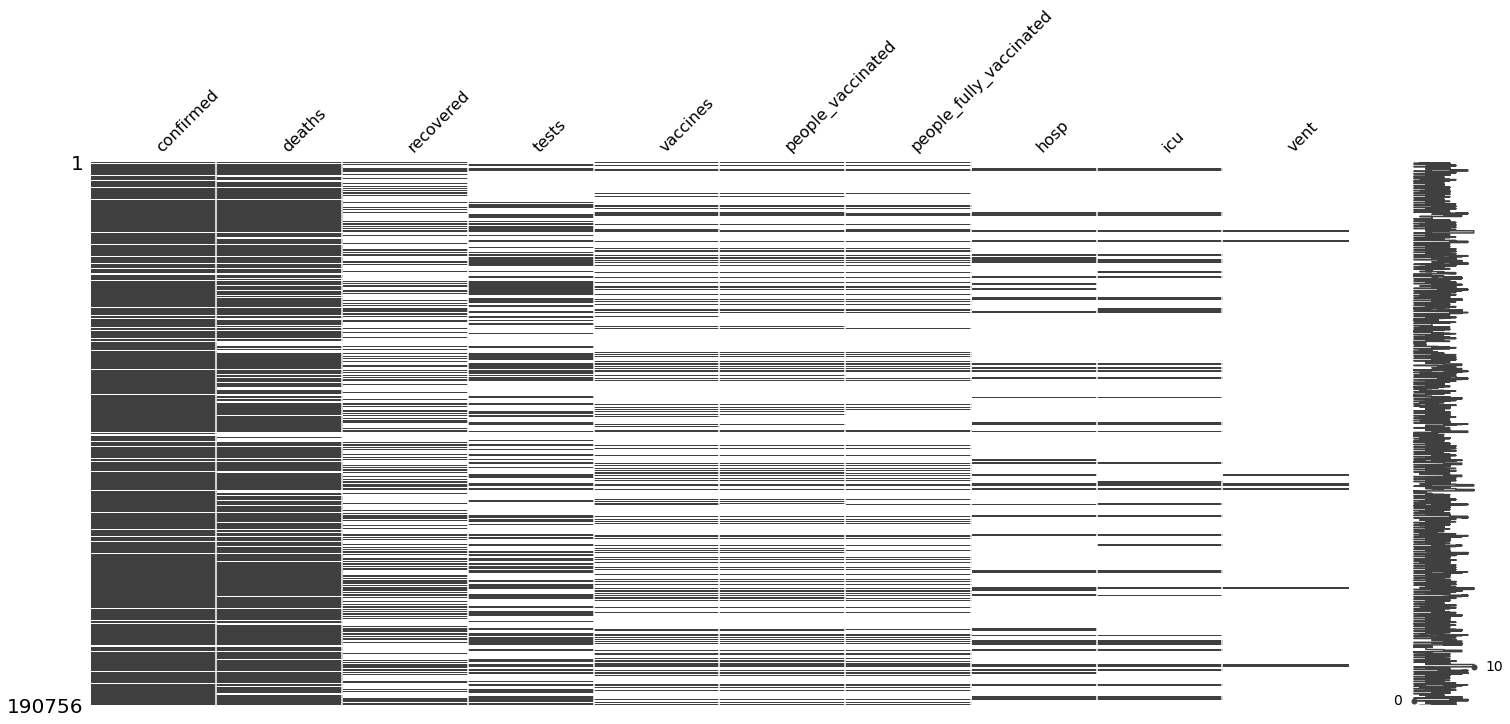

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(x[cumulative_features])

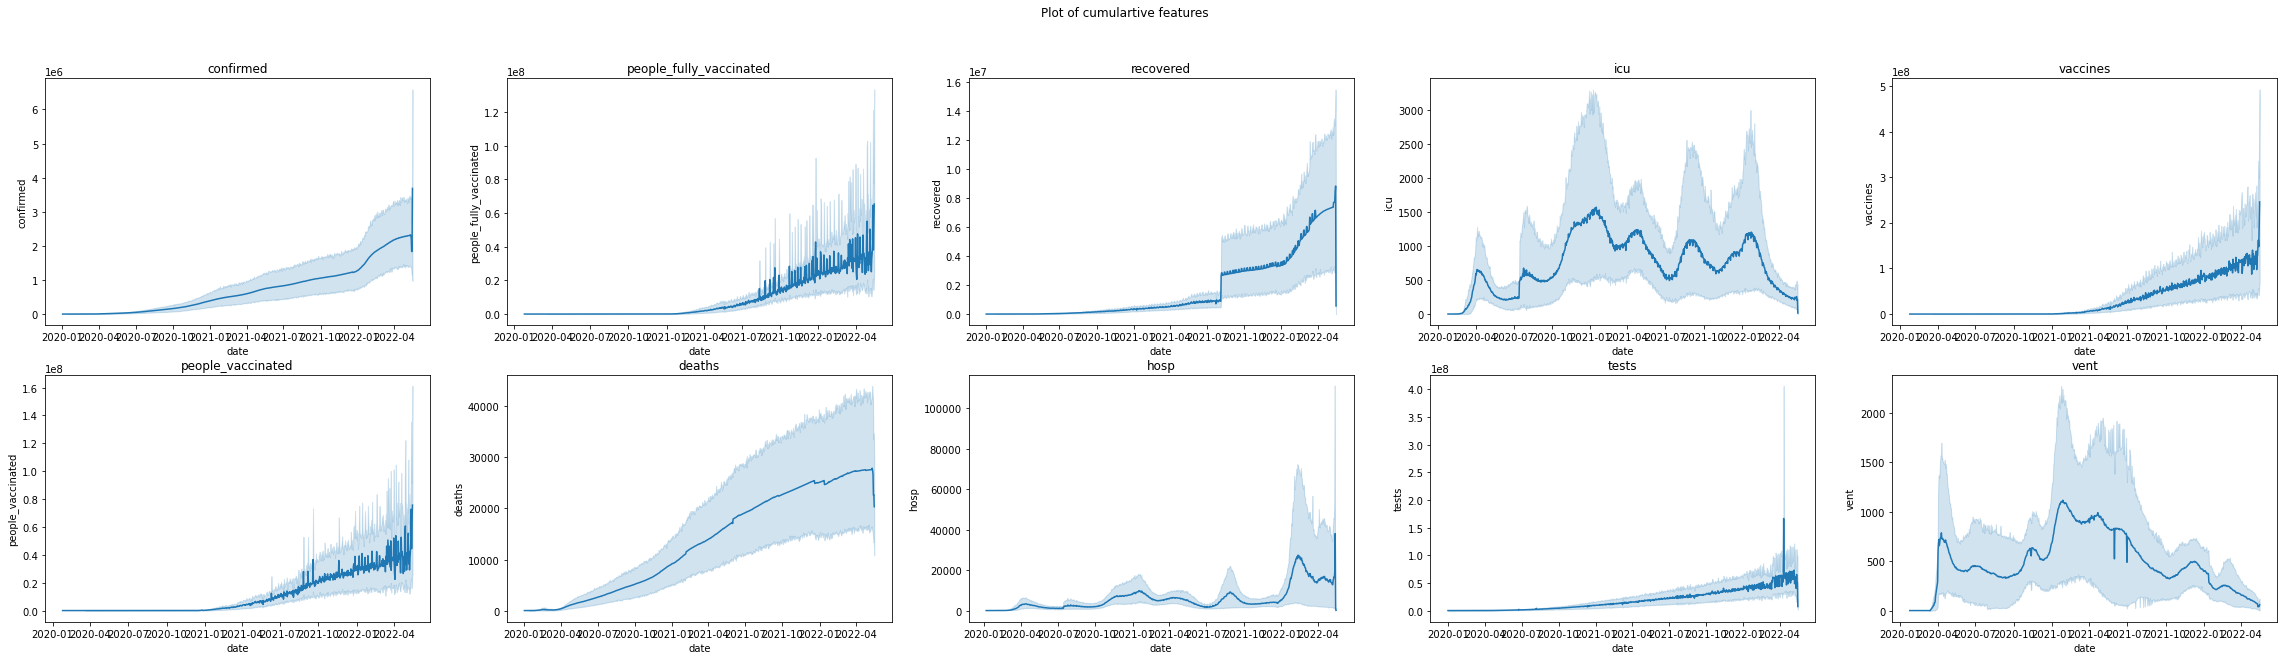

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(40, 10))
fig.suptitle('Plot of cumulartive features')


for i, c in enumerate(cumulative_features):
  sns.lineplot(ax = axes[i%2, i%5], x = 'date', y = c,data = x)
  axes[i%2, i%5].set_title(c)

On the visualizations above we see that we have some high vaiance for each plot and this is because we have one value for each country in one day. For global analysis we need to convert data so that it will has one value for each features in specyfic date to get time series.


In [ ]:
x = x[x['iso_alpha_3'].notnull()]

In [ ]:
any(x['iso_alpha_3'].isnull())

False

## Inputing null values

I decided to use interpolation to deal with missing data. I use interpolation for values in each country and after that I fill null on the start of time series beacause this nulls represent zero values.

In [ ]:
for c in np.unique(x['iso_alpha_3'].astype(str)):
    for feature in cumulative_features:
        x[feature].loc[x['iso_alpha_3']==c] = x[feature].loc[x['iso_alpha_3']==c].interpolate(method ='linear')

<AxesSubplot:>

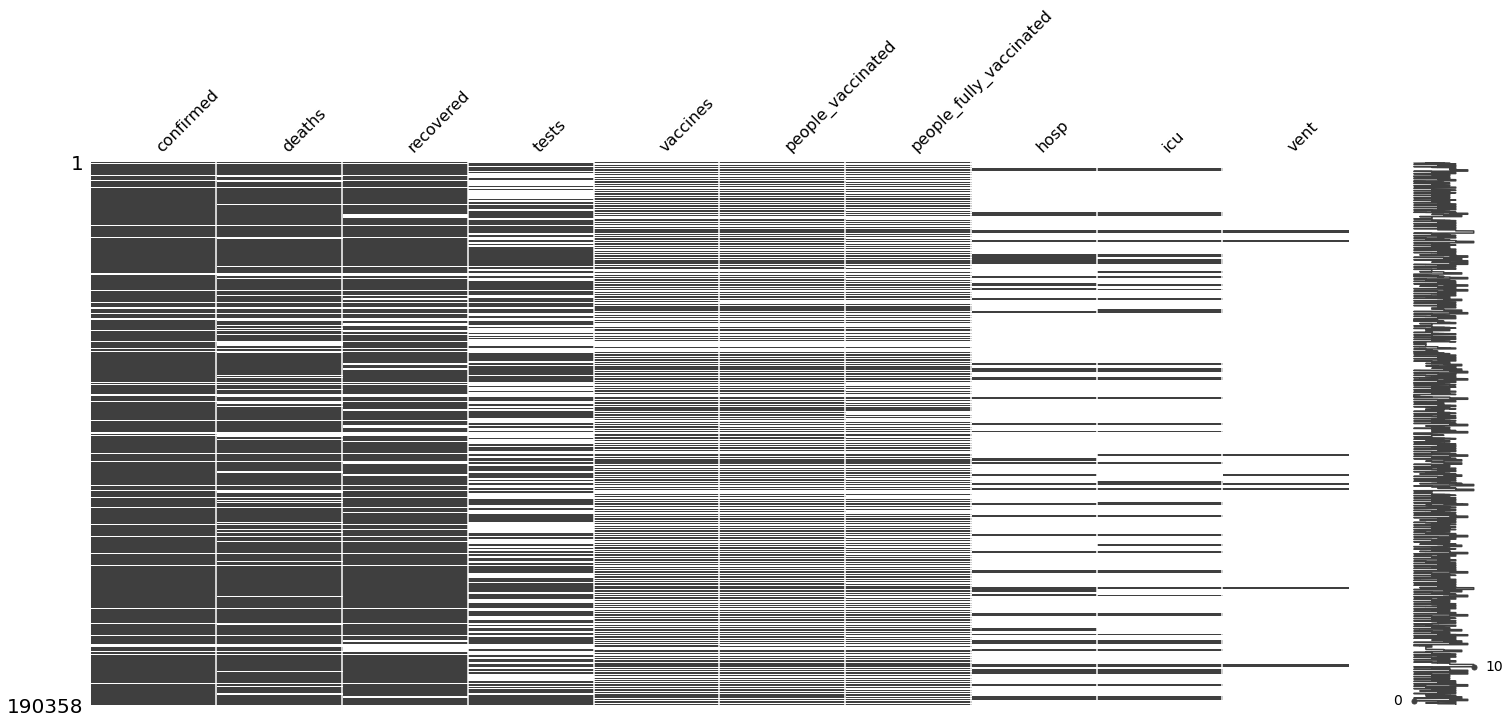

In [ ]:
msno.matrix(x[cumulative_features])

In [ ]:
for feature in cumulative_features:
    x[feature][x[feature].isnull()] = 0

## Creating local dataset of cases in France

I identify records of cases by iso_alpha_3 which is 3-letter code of the country according to the standard ISO 3166-1 Alpha-3. I will analyze local data in parallel with global data.

In [ ]:
x_local = x[x['iso_alpha_3'] == 'FRA']

## Data aggregation 

As i mentioned before after data cleaning we need to get sum of values for each feature in specyfic date. We also drop 4 last records which are outliers. This may be because not all countries have already reported daily reports.

In [ ]:
x = x.reset_index()

In [ ]:
x_global = pd.DataFrame()

for c in cumulative_features:
    x_global[c] = x[['date',c]].groupby(['date']).sum()

#drop last column due to underlying values (maybe not all of countries gave reports in this last day)
x_global = x_global[:-4]
x_global = x_global.reset_index()

## Daily increase columns

To build reliable model we need to do some feature engineering to make new daily increase features because model which based on cumulative features will has good scores due to always increasing values and evaluation will not reflect real error.

In [ ]:
#global
for c in cumulative_features:
    k = list()
    k.append(0)
    k[1:] = np.diff(x_global[c])
    x_global[c + '_daily_increase'] = k
    
#local
for c in cumulative_features:
    k = list()
    k.append(0)
    k[1:] = np.diff(x_local[c])
    x_local[c + '_daily_increase'] = k

### Checking nulls in global data

In [ ]:
print("Is any null in column: \n")

for c in x_global.columns:
    print(" {}: {}".format(c, any(x_global[c].isnull())))

Is any null in column: 

 date: False
 confirmed: False
 deaths: False
 recovered: False
 tests: False
 vaccines: False
 people_vaccinated: False
 people_fully_vaccinated: False
 hosp: False
 icu: False
 vent: False
 confirmed_daily_increase: False
 deaths_daily_increase: False
 recovered_daily_increase: False
 tests_daily_increase: False
 vaccines_daily_increase: False
 people_vaccinated_daily_increase: False
 people_fully_vaccinated_daily_increase: False
 hosp_daily_increase: False
 icu_daily_increase: False
 vent_daily_increase: False


### Checking nulls in local data

In [ ]:
print("Is any null in column: \n")

for c in x_global.columns:
    print(" {}: {}".format(c, any(x_local[c].isnull())))

Is any null in column: 

 date: False
 confirmed: False
 deaths: False
 recovered: False
 tests: False
 vaccines: False
 people_vaccinated: False
 people_fully_vaccinated: False
 hosp: False
 icu: False
 vent: False
 confirmed_daily_increase: False
 deaths_daily_increase: False
 recovered_daily_increase: False
 tests_daily_increase: False
 vaccines_daily_increase: False
 people_vaccinated_daily_increase: False
 people_fully_vaccinated_daily_increase: False
 hosp_daily_increase: False
 icu_daily_increase: False
 vent_daily_increase: False


## Visualizations of daily increase features

### global

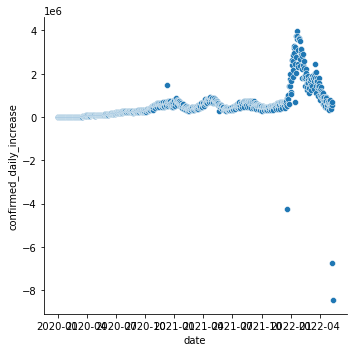

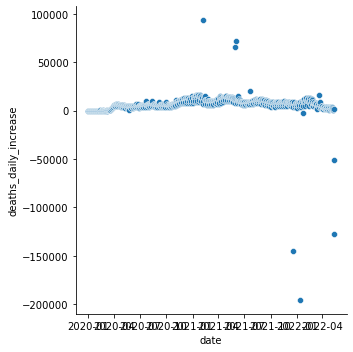

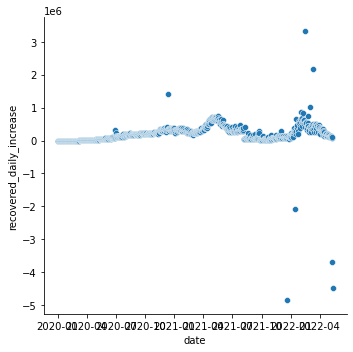

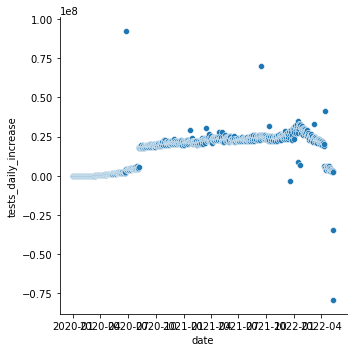

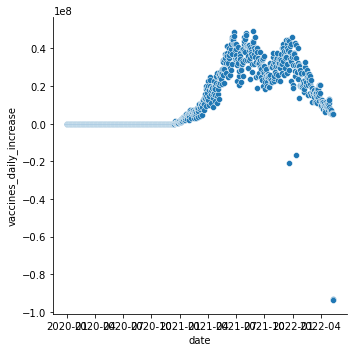

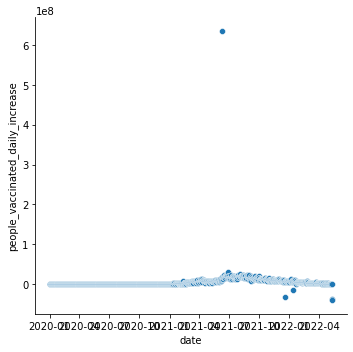

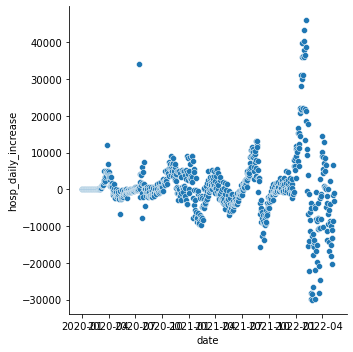

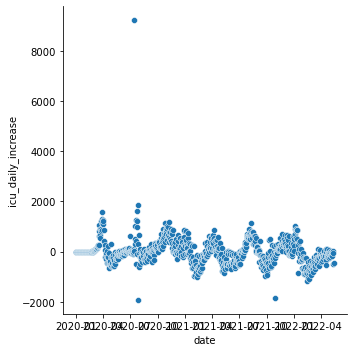

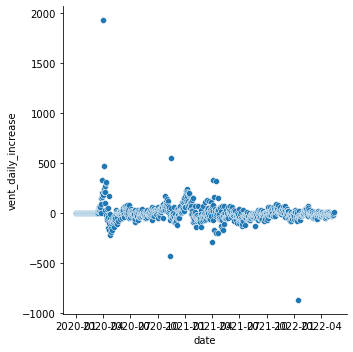

In [ ]:
daily_increase_cols = ['confirmed_daily_increase', 'deaths_daily_increase', "recovered_daily_increase", 'tests_daily_increase','vaccines_daily_increase','people_vaccinated_daily_increase','hosp_daily_increase', 'icu_daily_increase', 'vent_daily_increase']

for c in daily_increase_cols:
    sns.relplot(x="date",y=c, data=x_global)

### local

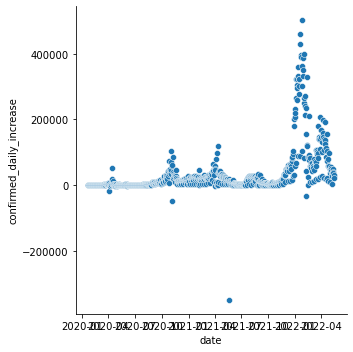

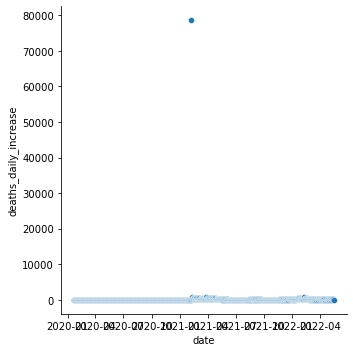

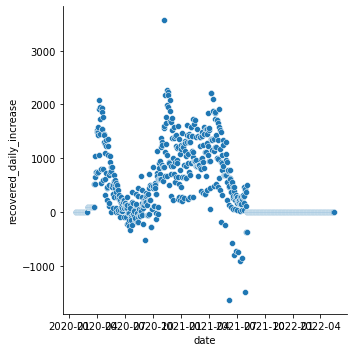

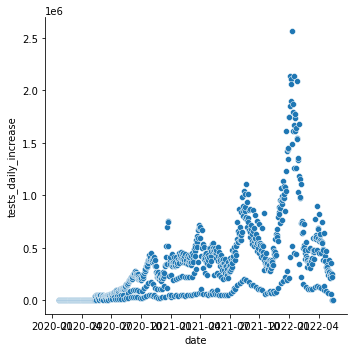

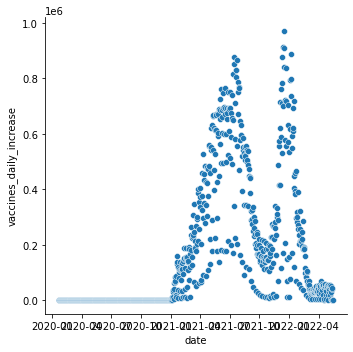

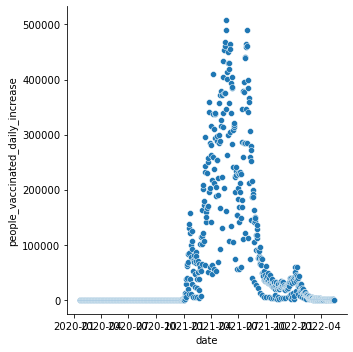

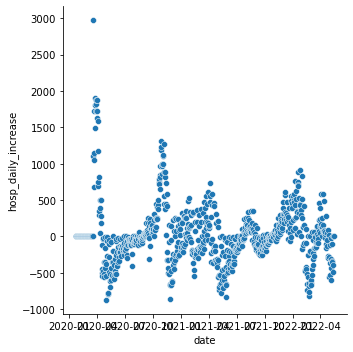

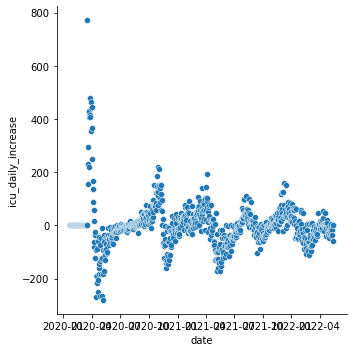

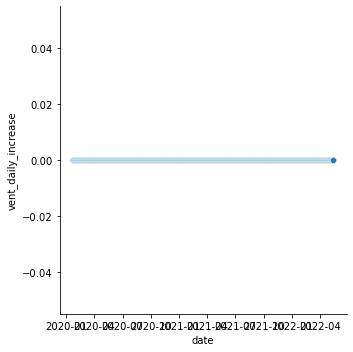

In [ ]:
for c in daily_increase_cols:
    sns.relplot(x="date",y=c, data=x_local)

Based on this plots we can see that in our data there are some outliers which shoudl be replaced by some locally non-outlier value. To do so I use middle value of some interval witch I use to find outliers. To find outliers in our time series I used tsmoothie wchich computes, in a fast and efficient way, the smoothing of single or multiple time-series.

### Droping vent_daily_increase column in local data

After interpolation we have all zero values because this column was already all null before this operation.

In [ ]:
x_local = x_local.drop(columns=['vent_daily_increase'])


## Time seires outliers detection and smoothing

### global

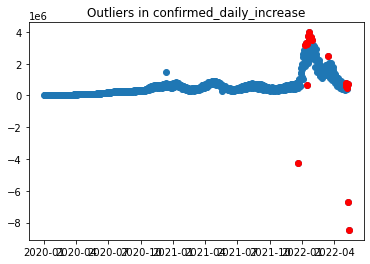

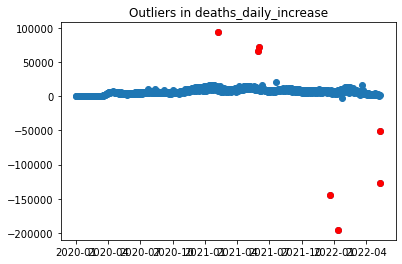

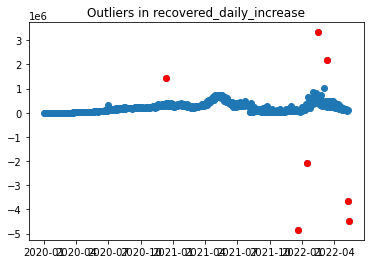

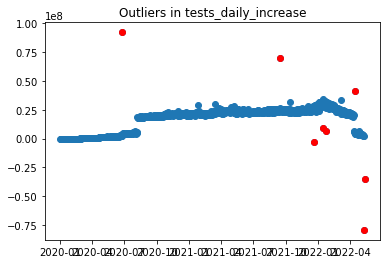

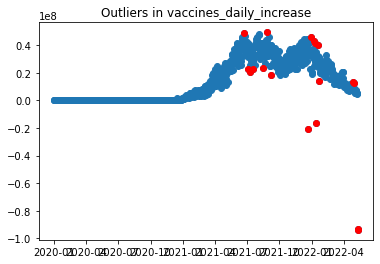

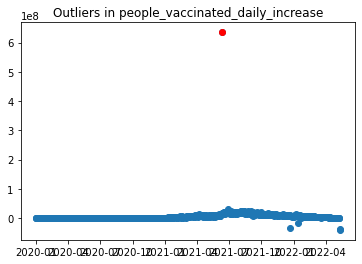

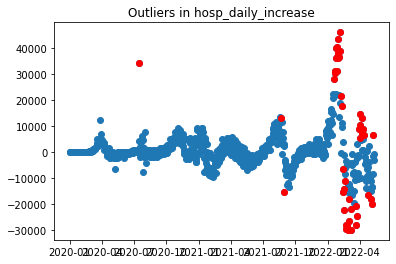

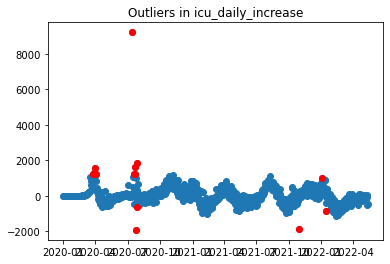

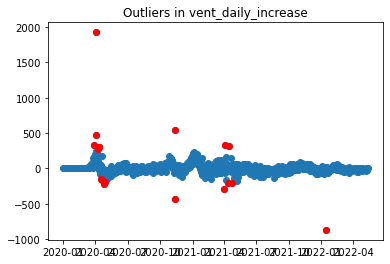

In [ ]:
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

x_global_clear = x_global.copy()

for c in daily_increase_cols:

    data = x_global[c].values.reshape(1,-1)

    # operate smoothing
    smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
    smoother.smooth(data)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    points = smoother.data[0]
    up_points = up[0]
    low_points = low[0]


    plt.subplots()
    plt.scatter(x_global['date'],x_global[c])

    for i in range(len(points)-1, 0, -1):
        current_point = points[i]
        current_up = up_points[i]
        current_low = low_points[i]
        to_imput = current_up+current_low/2
        if current_point > current_up or current_point < current_low:
            plt.scatter(x_global['date'].loc[x_global[c] == current_point],current_point, color='red')
            plt.title(f'Outliers in {c}')
            x_global_clear[c].loc[x_global[c] == current_point] = current_up+current_low/2


## Visualizations after time series outiers replacement

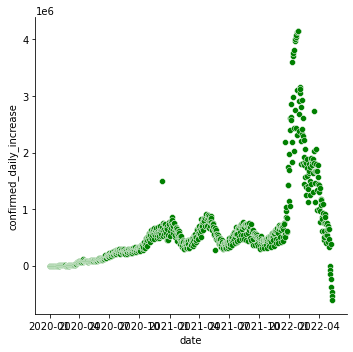

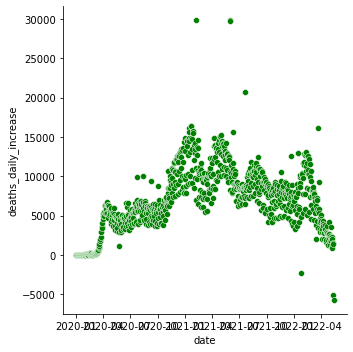

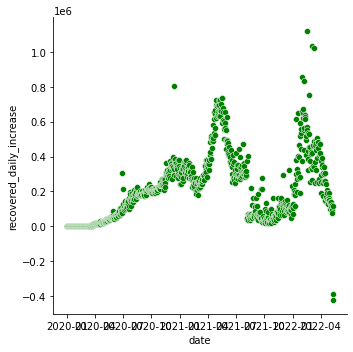

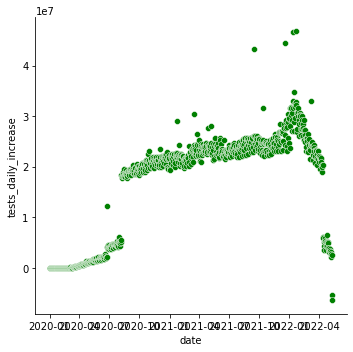

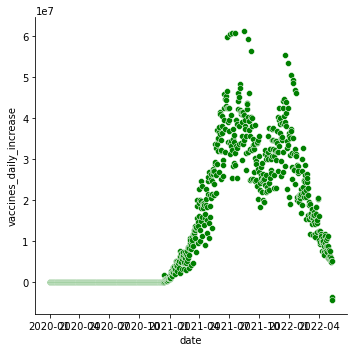

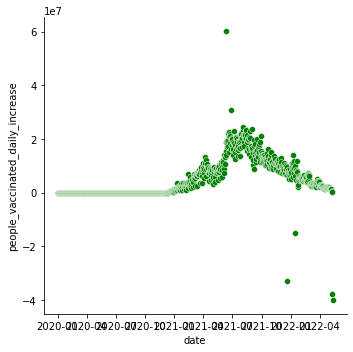

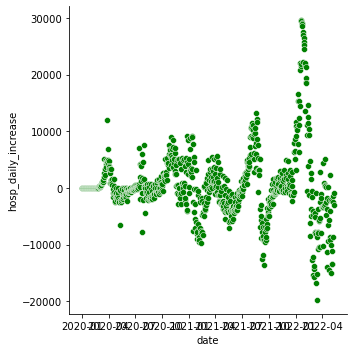

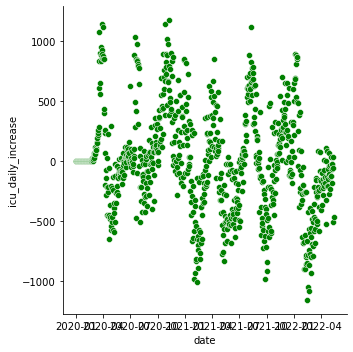

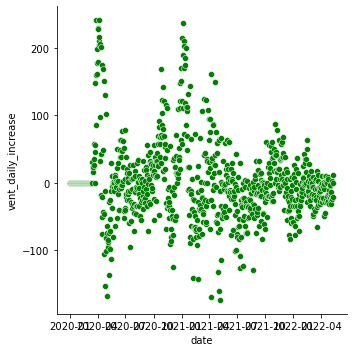

In [ ]:
#global
for c in daily_increase_cols:
    sns.relplot(data=x_global_clear, x='date',y=c, color='green')

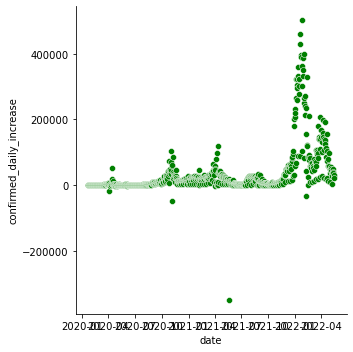

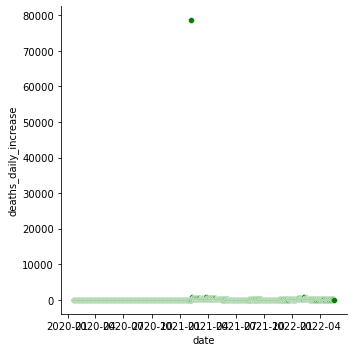

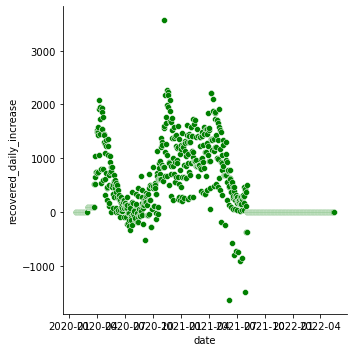

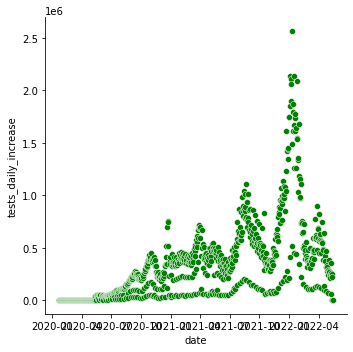

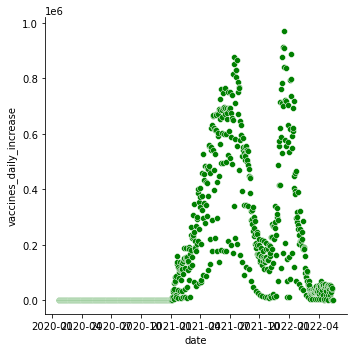

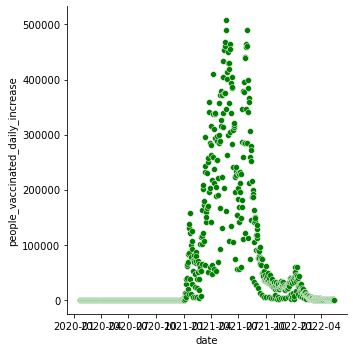

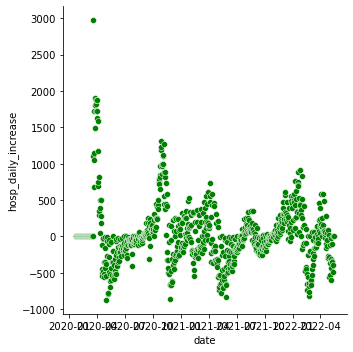

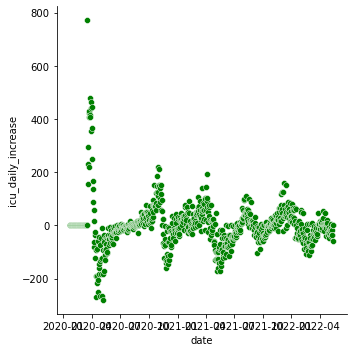

In [ ]:
#local
daily_increase_cols_local = daily_increase_cols
daily_increase_cols_local.remove('vent_daily_increase')

for c in daily_increase_cols:
    sns.relplot(data=x_local, x='date',y=c, color='green')

# Prediction of daily increase in deaths caused by the                 infection of COVID-19

## Linear models

I decided to make train data in split form. I split the data based on the date in the 3/4 of the range.

In [ ]:
cut_off = x_global_clear['date'].iloc[int(len(x_global_clear)*0.75)]

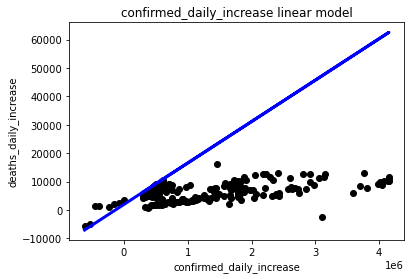

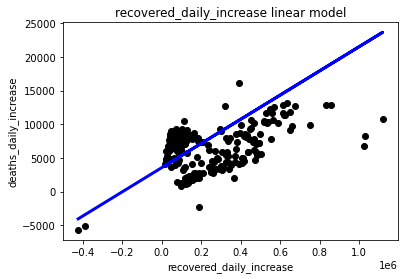

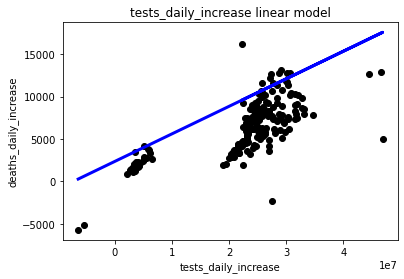

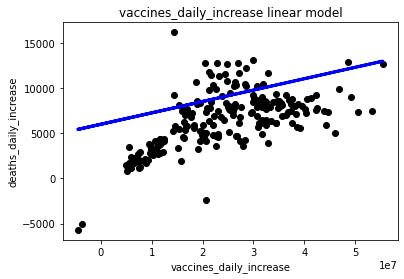

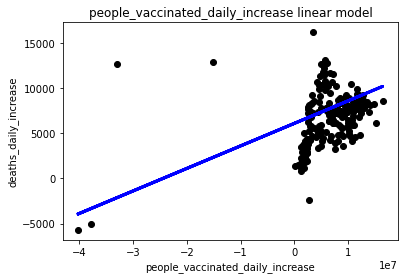

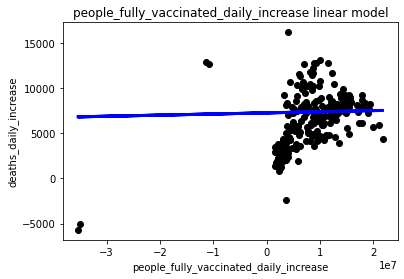

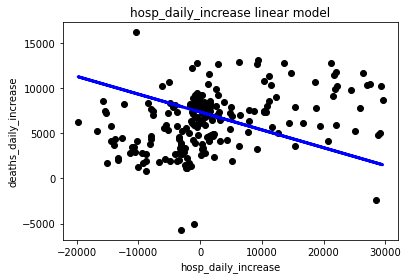

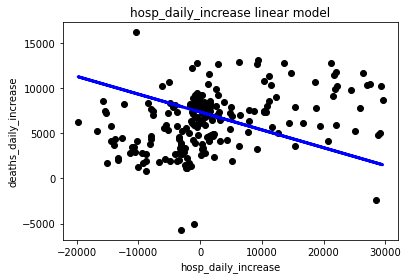

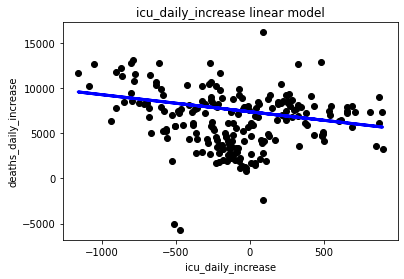

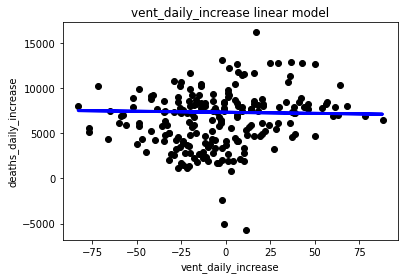

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_regr_results = pd.DataFrame()

to_X_train_global = ['confirmed_daily_increase', 'recovered_daily_increase', 'tests_daily_increase', 'vaccines_daily_increase', 'people_vaccinated_daily_increase', 'people_fully_vaccinated_daily_increase', 'hosp_daily_increase', 'hosp_daily_increase', 'icu_daily_increase', 'vent_daily_increase']

y_train_global = x_global_clear.loc[x_global_clear['date']<cut_off]['deaths_daily_increase'].values
y_test_global = x_global_clear.loc[x_global_clear['date']>cut_off]['deaths_daily_increase'].values


for c in to_X_train_global:
    X_train_global = x_global_clear.loc[x_global_clear['date']<cut_off][c].values.reshape(-1,1)
    X_test_global = x_global_clear.loc[x_global_clear['date']>cut_off][c].values.reshape(-1,1)

    reg = LinearRegression()
    reg.fit(X_train_global, y_train_global)
    
    y_pred_global = reg.predict(X_test_global)
    
    row = {'Model': c, 'mean_square_error': mean_squared_error(y_test_global, y_pred_global), 'r2-score': r2_score(y_test_global, y_pred_global)}
    
    lin_regr_results = lin_regr_results.append(row,ignore_index=True)
    
    plt.scatter(X_test_global, y_test_global, color="black")
    plt.plot(X_test_global, y_pred_global, color="blue", linewidth=3)
    
    plt.title(f"{c} linear model")
    plt.xlabel(c)
    plt.ylabel('deaths_daily_increase')

    plt.show()

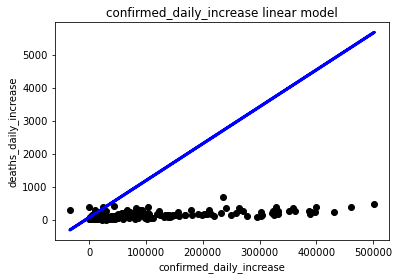

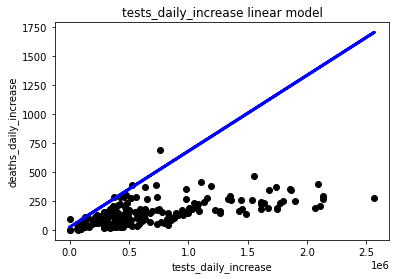

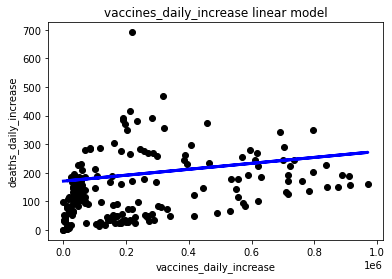

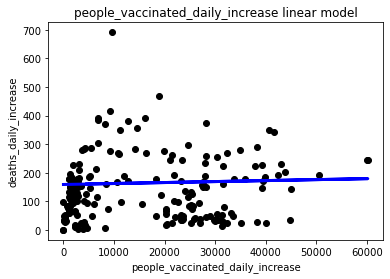

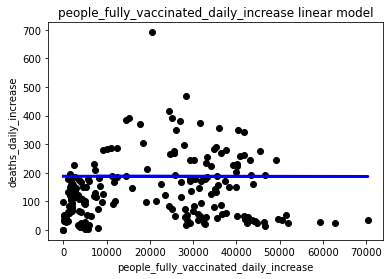

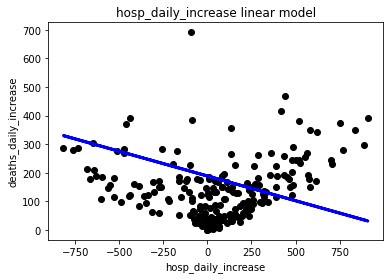

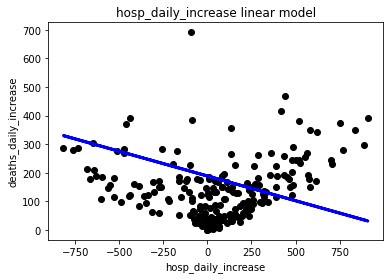

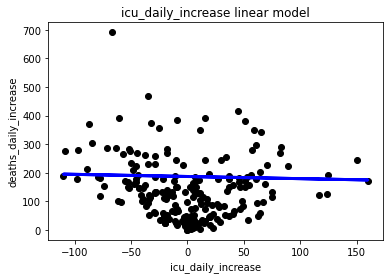

In [ ]:
lin_regr_results_local = pd.DataFrame()

to_X_train_local = ['confirmed_daily_increase', 'tests_daily_increase', 'vaccines_daily_increase', 'people_vaccinated_daily_increase', 'people_fully_vaccinated_daily_increase', 'hosp_daily_increase', 'hosp_daily_increase', 'icu_daily_increase']

y_train_local = x_local.loc[x_local['date']<cut_off]['deaths_daily_increase'].values
y_test_local = x_local.loc[x_local['date']>cut_off]['deaths_daily_increase'].values


for c in to_X_train_local:
    X_train_local = x_local.loc[x_local['date']<cut_off][c].values.reshape(-1,1)
    X_test_local = x_local.loc[x_local['date']>cut_off][c].values.reshape(-1,1)

    reg = LinearRegression()
    reg.fit(X_train_local, y_train_local)
    
    y_pred_local = reg.predict(X_test_local)
    
    row = {'Model': c, 'mean_square_error': mean_squared_error(y_test_local, y_pred_local), 'r2-score': r2_score(y_test_local, y_pred_local)}
    
    lin_regr_results_local = lin_regr_results_local.append(row,ignore_index=True)
    
    plt.scatter(X_test_local, y_test_local, color="black")
    plt.plot(X_test_local, y_pred_local, color="blue", linewidth=3)
    
    plt.title(f"{c} linear model")
    plt.xlabel(c)
    plt.ylabel('deaths_daily_increase')

    plt.show()

### Results of MSE and r2 scores for each model

In [ ]:
lin_regr_results #global

Model  mean_square_error   r2-score
0                confirmed_daily_increase       3.947150e+08 -38.100667
1                recovered_daily_increase       1.603513e+07  -0.588449
2                    tests_daily_increase       1.621012e+07  -0.605783
3                 vaccines_daily_increase       1.318874e+07  -0.306483
4        people_vaccinated_daily_increase       9.862422e+06   0.023023
5  people_fully_vaccinated_daily_increase       1.070506e+07  -0.060449
6                     hosp_daily_increase       1.833747e+07  -0.816519
7                     hosp_daily_increase       1.833747e+07  -0.816519
8                      icu_daily_increase       1.124198e+07  -0.113636
9                     vent_daily_increase       1.098351e+07  -0.088032

In [ ]:
lin_regr_results_local #local

Model  mean_square_error    r2-score
0                confirmed_daily_increase       2.444876e+06 -224.858133
1                    tests_daily_increase       1.780354e+05  -15.446947
2                 vaccines_daily_increase       1.272001e+04   -0.175076
3        people_vaccinated_daily_increase       1.138948e+04   -0.052162
4  people_fully_vaccinated_daily_increase       1.323016e+04   -0.222205
5                     hosp_daily_increase       1.714684e+04   -0.584029
6                     hosp_daily_increase       1.714684e+04   -0.584029
7                      icu_daily_increase       1.308586e+04   -0.208874

From above r2 scores for both local and global we can infer that models do not follow the trend of the data and fits worse than a horizontal line so our models fit the data really poorly. We have 3 models in global and 4 in local which can be choosed as better than the rest - vent_daily_increase, people_vaccinated_daily_increase, people_fully_vaccinated_daily_increase and hosp_daily_increase for local but I will check normality of residuals only for vent_daily_increase model in global data and for tests_daily_increase because this featuers for each data has the most sens for me.

### Checking assumption of normality of residuals in global model

In [ ]:
X_train_global = x_global_clear.loc[x_global_clear['date']<cut_off]["vent_daily_increase"].values.reshape(-1,1)
X_test_global = x_global_clear.loc[x_global_clear['date']>cut_off]["vent_daily_increase"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train_global, y_train_global)

y_pred_global = reg.predict(X_test_global)

residual = (y_test_global - y_pred_global)

residual.mean()

-895.5439045323758

The mean of resiuduals should be approximately zero but it's not.

Text(0, 0.5, 'Residuals')

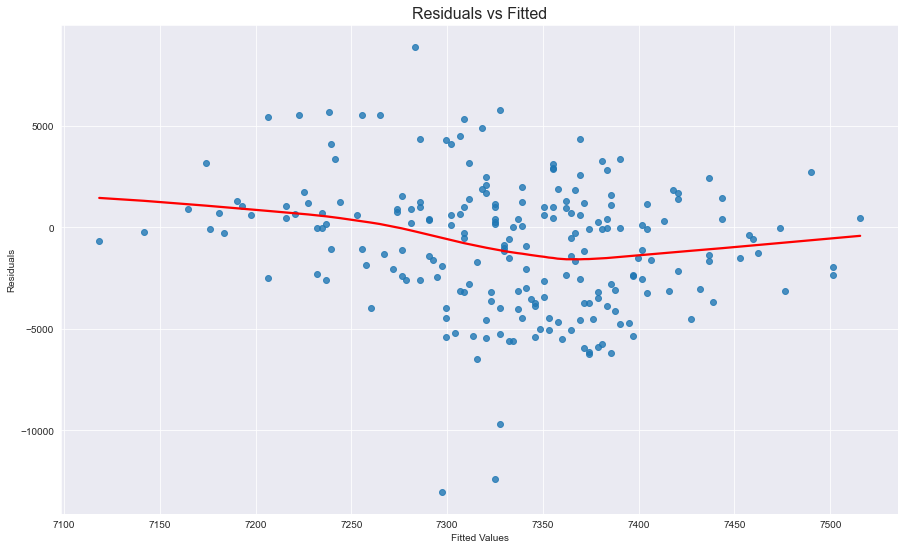

In [ ]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

#fig, ax = plt.subplots(1,2)

sns.regplot(x=y_pred_global, y=residual, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

With some error, the graph indicates normality of residuals but we reject this assumption due to not zero value of mean so we cannot consider this model as reliable.

### Checking assumption of normality of residuals in local model

In [ ]:
X_train_local = x_local.loc[x_local['date']<cut_off]["tests_daily_increase"].values.reshape(-1,1)
X_test_local = x_local.loc[x_local['date']>cut_off]["tests_daily_increase"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train_local, y_train_local)

y_pred_local = reg.predict(X_test_local)

residual_local = (y_test_local - y_pred_local)

residual_local.mean()

-311.1104346225771

Text(0, 0.5, 'Residuals')

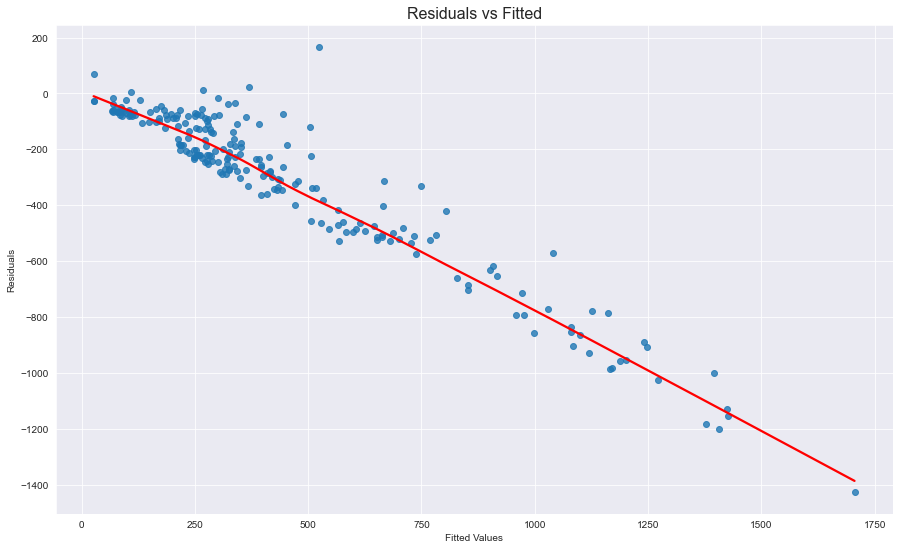

In [ ]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

#fig, ax = plt.subplots(1,2)

sns.regplot(x=y_pred_local, y=residual_local, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

The graph doesn't indicates normality of residuals and also mean of residuals is not equal to zero so we assumption of normality of residuals for local data we cannot consider this model as reliable.

 ## linearity of variables plot

### global

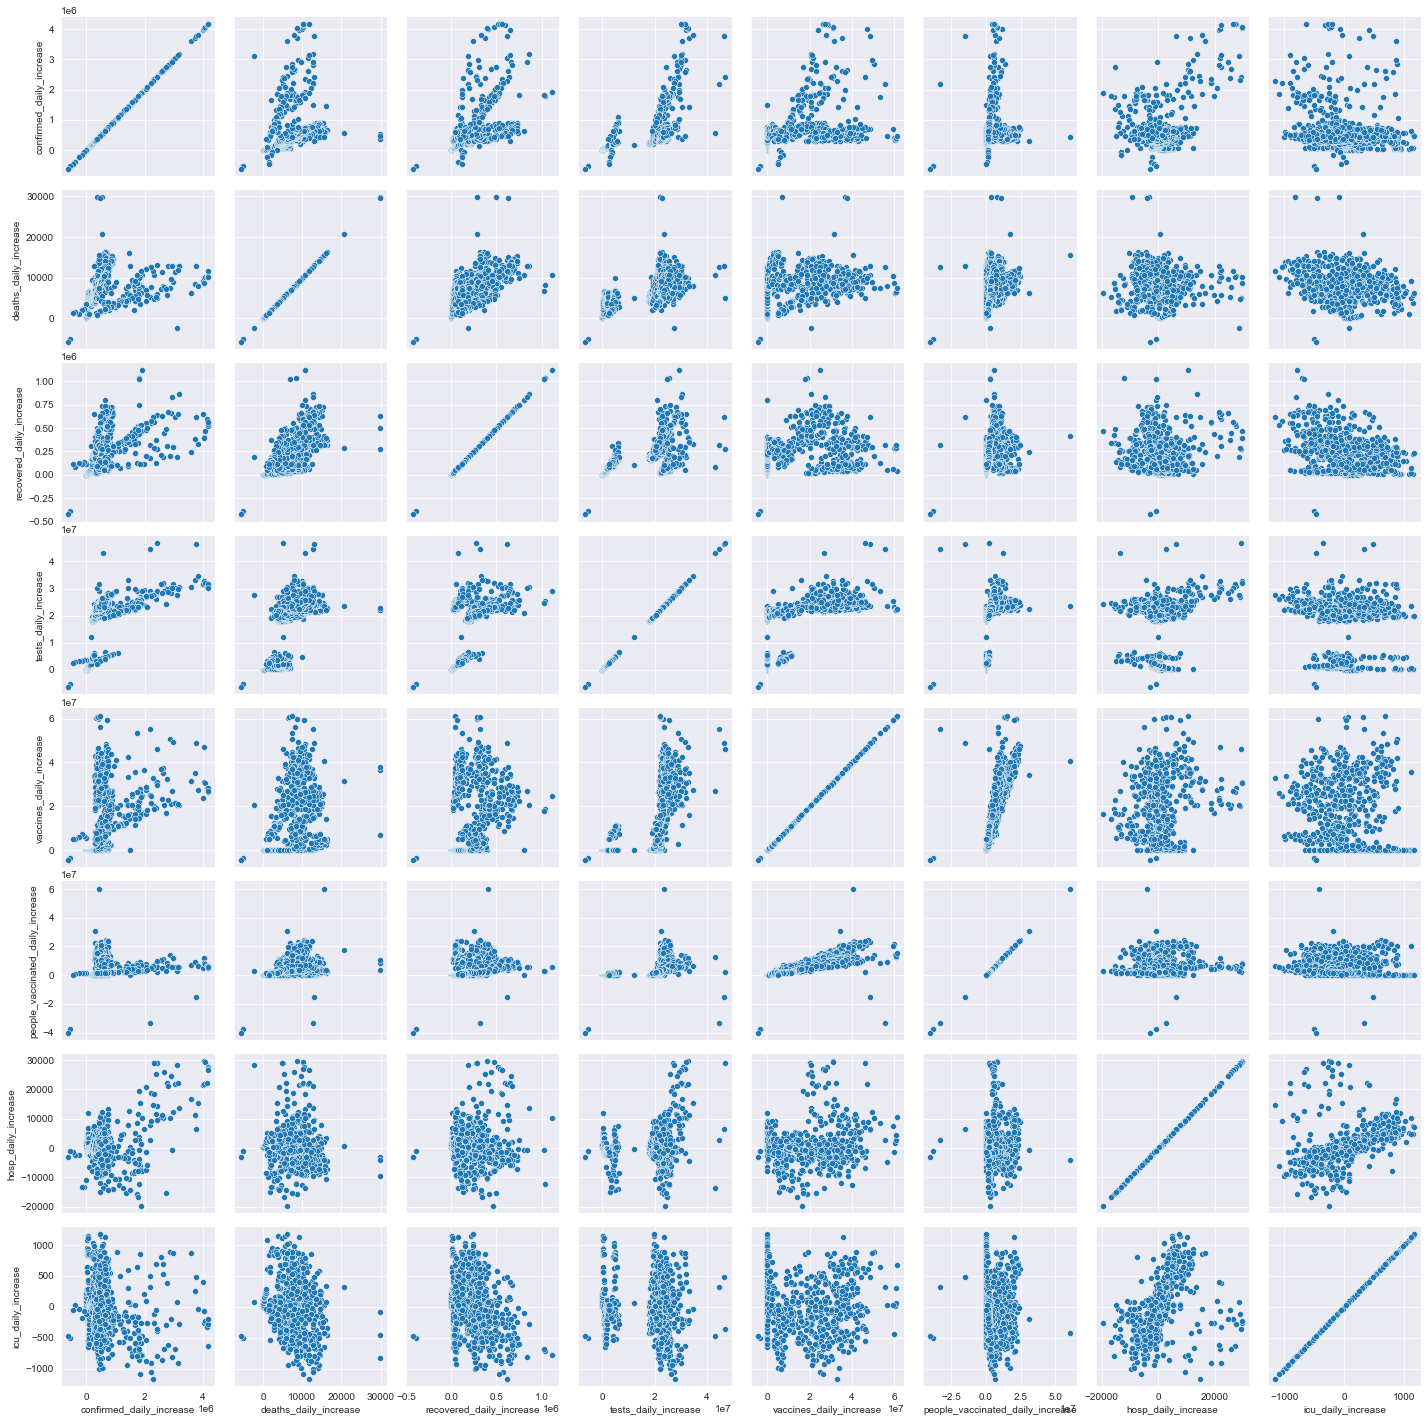

In [ ]:
g = sns.PairGrid(x_global_clear[daily_increase_cols])
g.map(sns.scatterplot)

### local

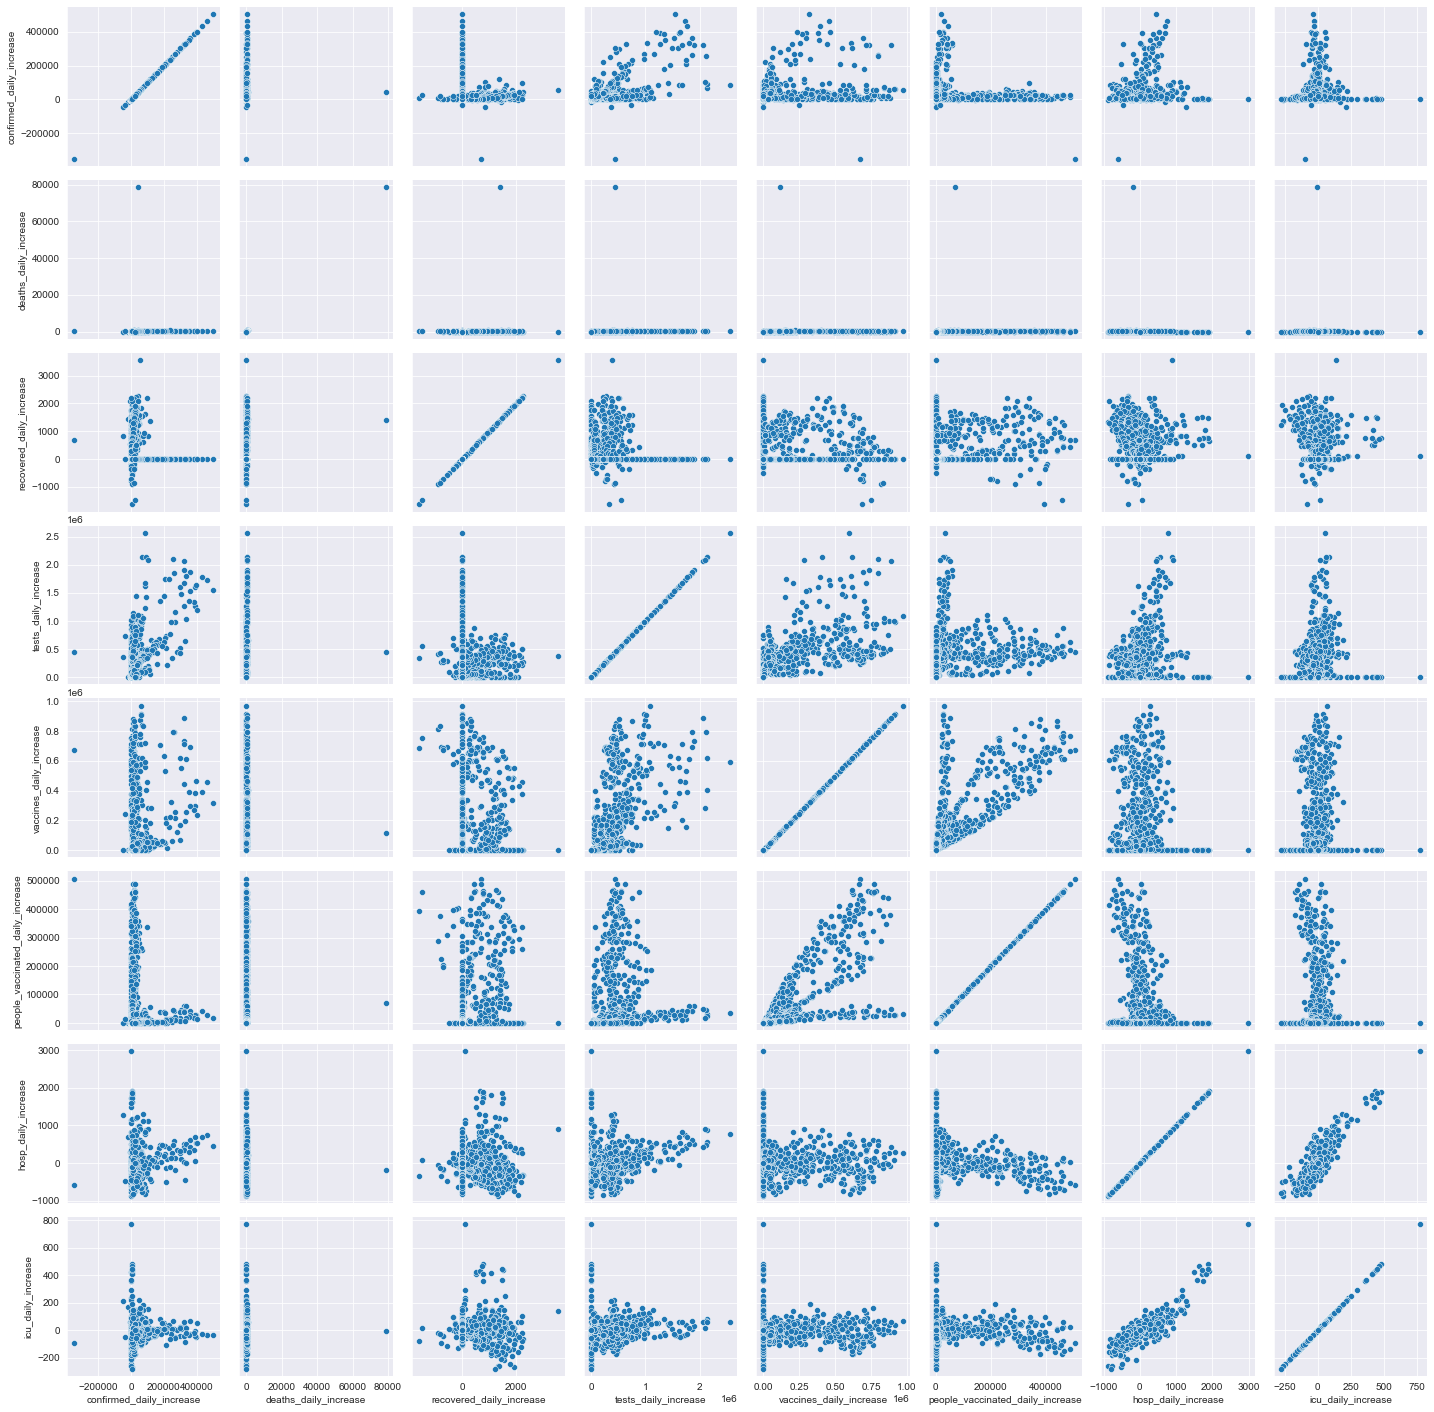

In [ ]:
g = sns.PairGrid(x_local[daily_increase_cols_local])
g.map(sns.scatterplot)

## Corelation map

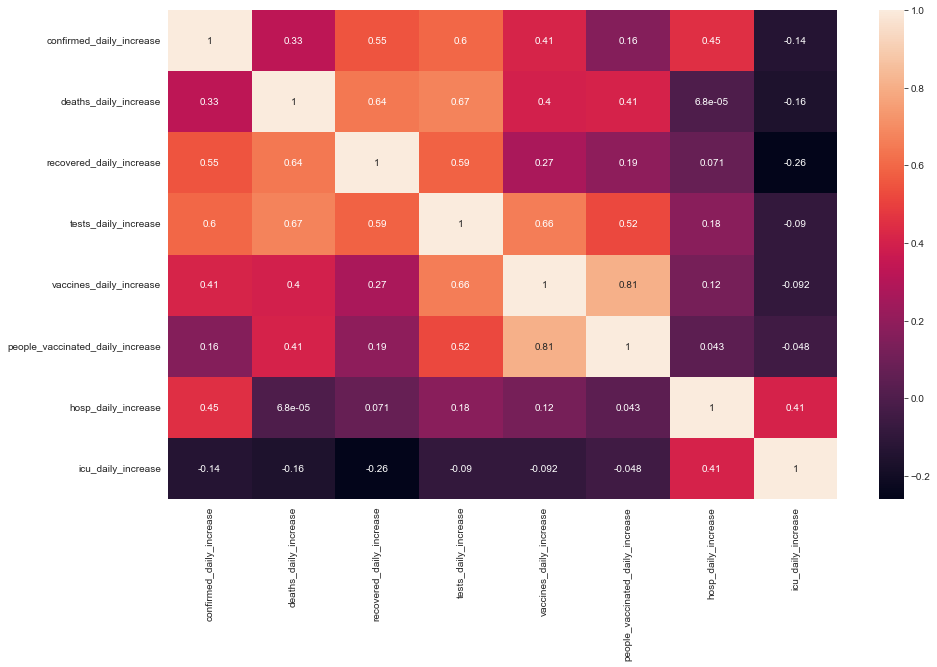

In [ ]:
corrMatrix = x_global_clear[daily_increase_cols].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

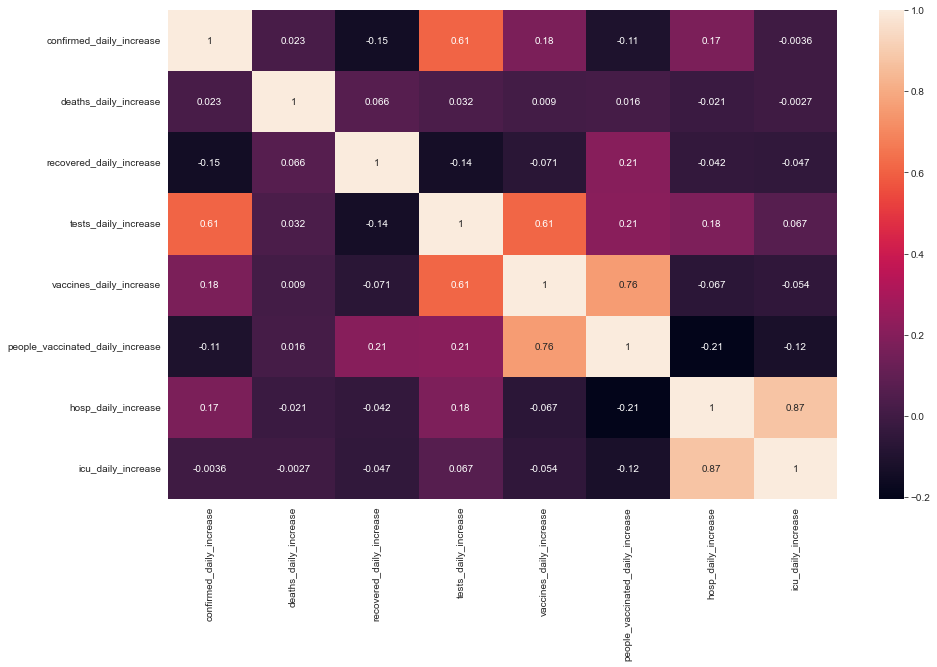

In [ ]:
corrMatrix = x_local[daily_increase_cols_local].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

After exploration of linearity from the plots I chose two features in global data (confirmed_daily_increase and recovered_daily_increase) and two in local (confirmed_daily_increase and tests_daily_increase) to make predictions of deaths_daily_increase.


## Multi-linear Regression

### global

In [ ]:
X_train_global = x_global_clear.loc[x_global_clear['date']<cut_off][['confirmed_daily_increase','recovered_daily_increase']]
X_test_global = x_global_clear.loc[x_global_clear['date']>cut_off][['confirmed_daily_increase','recovered_daily_increase']]

reg_lr_global_d = LinearRegression()
reg_lr_global_d.fit(X_train_global, y_train_global)

y_pred_d_global1 = reg_lr_global_d.predict(X_test_global)

print(f'Mean square error of multi-linear model: {mean_squared_error(y_test_global, y_pred_d_global1)} r2-score: {r2_score(y_test_global, y_pred_d_global1)}')

Mean square error of multi-linear model: 268070858.78376776 r2-score: -25.555236589084103


### local

In [ ]:
X_train_local = x_local.loc[x_local['date']<cut_off][['confirmed_daily_increase','tests_daily_increase']]
X_test_local = x_local.loc[x_local['date']>cut_off][['confirmed_daily_increase','tests_daily_increase']]

reg_lr_global_d = LinearRegression()
reg_lr_global_d.fit(X_train_local, y_train_local)

y_pred_d_local1 = reg_lr_global_d.predict(X_test_local)

print(f'Mean square error of multi-linear model: {mean_squared_error(y_test_local, y_pred_d_local1)} r2-score: {r2_score(y_test_local, y_pred_d_local1)}')

Mean square error of multi-linear model: 2673994.532140781 r2-score: -246.0240984471866


R2 score show us that also for this multi-linear model we have doesn't fit the data well trained on local and global data.

## Support Vector Regression

### global

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train_global, y_train_global)

y_pred_d_global2 = svr.predict(X_test_global)

r2_score(y_test_global, y_pred_d_global2)

-0.035489625748595266

### local

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train_local, y_train_local)

y_pred_d_local2 = svr.predict(X_test_local)

r2_score(y_test_local, y_pred_d_local2)

-1.0118589203237747

In case of SVR model for local and global data we got better results than in multi-linears model but still not a good models.

## Random Forest Regressor

Scaling is not necessary for random forests so we train it on our orginal training dataset.

### global

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_global, y_train_global)

y_pred_d_global3 = rf.predict(X_test_global)

r2_score(y_test_global, y_pred_d_global3)

-1.9368141487021977

### local

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_local, y_train_local)

y_pred_d_local3 = rf.predict(X_test_local)

r2_score(y_test_local, y_pred_d_local3)

-1316.2347724297356

Random forest regression doesn't fit well in both models.

# Prediction of global daily increase in confirmed cases COVID-19

## Linerar models

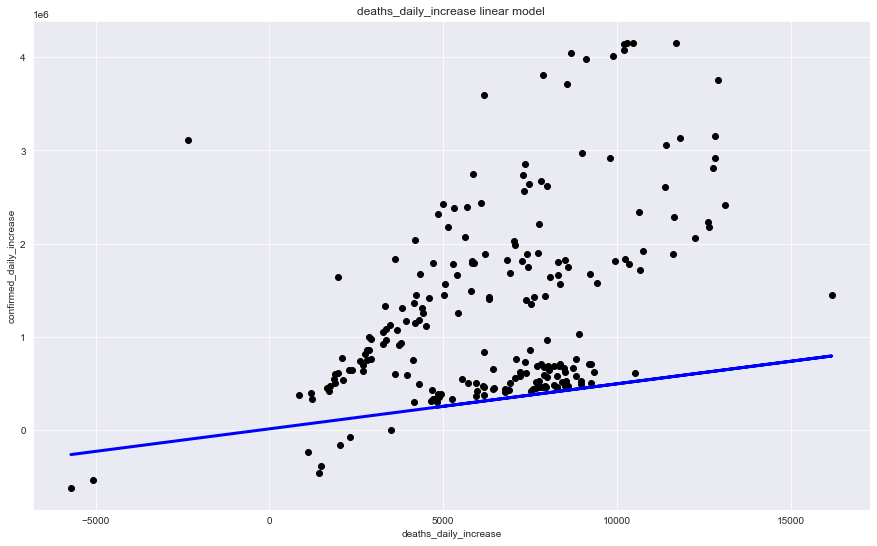

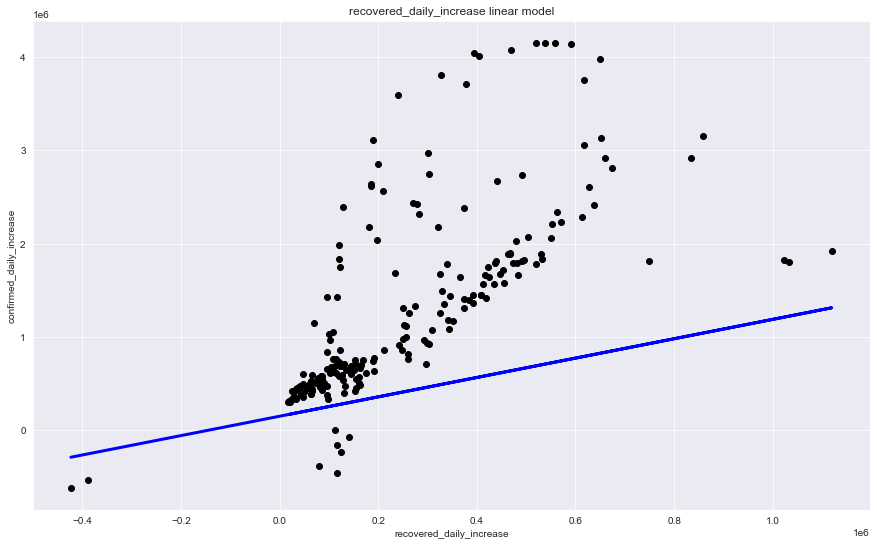

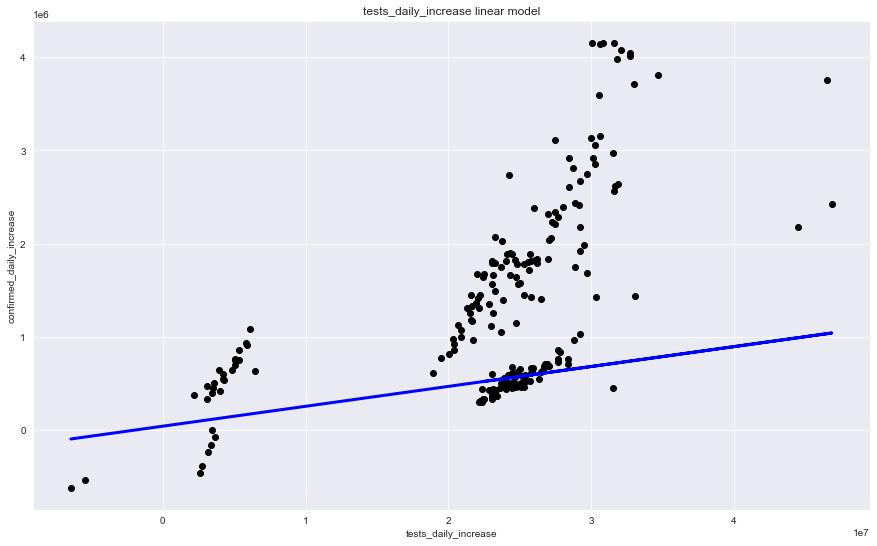

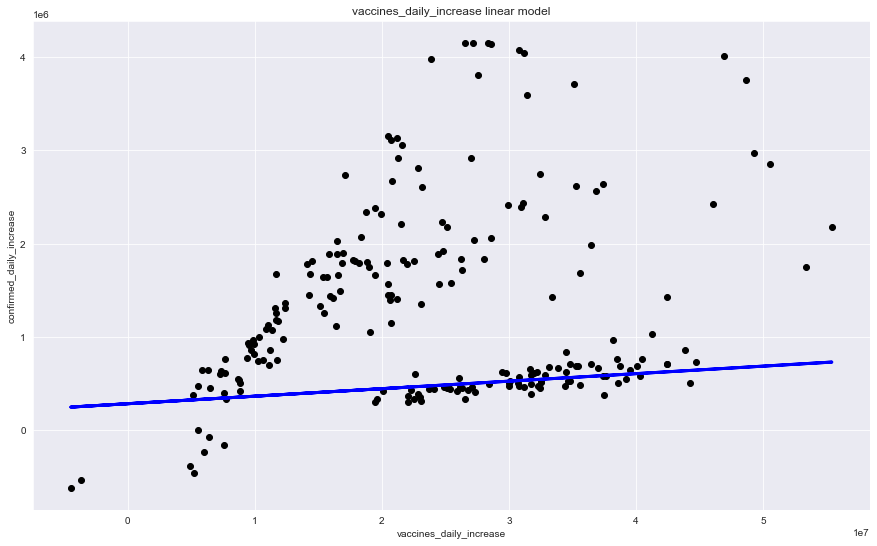

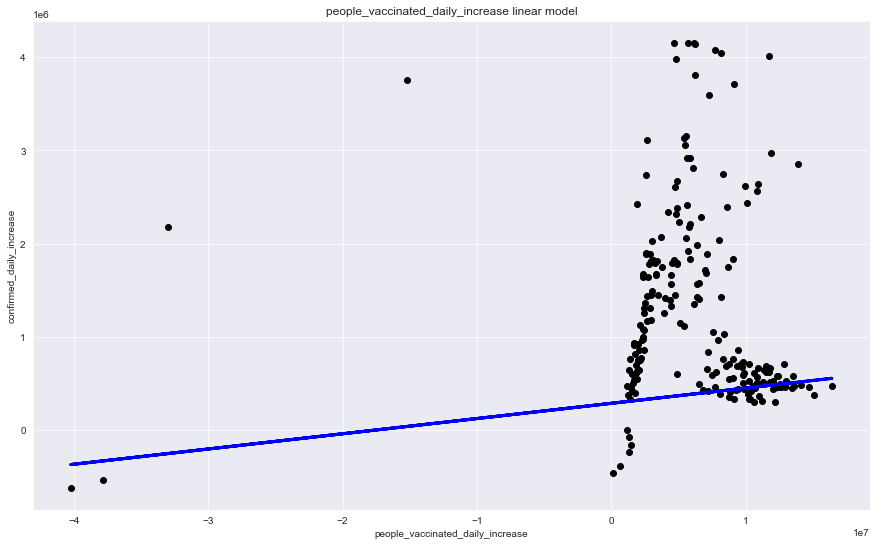

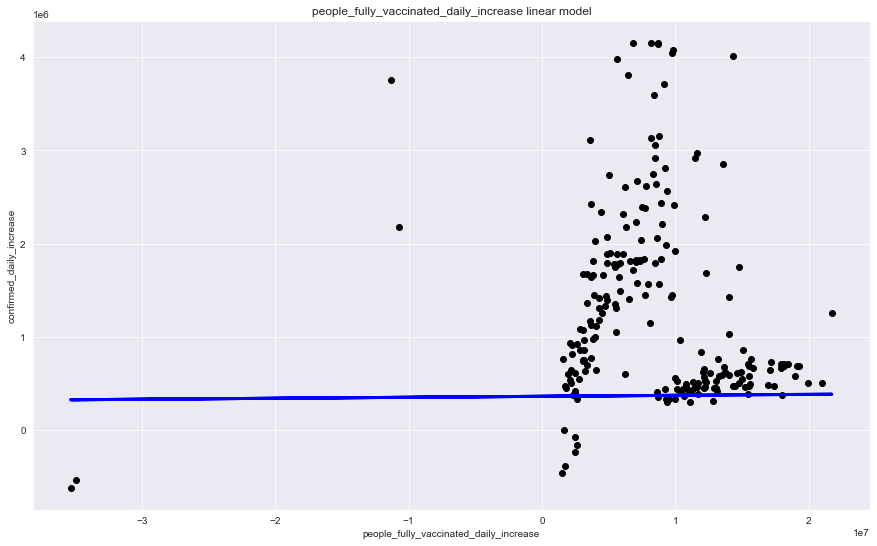

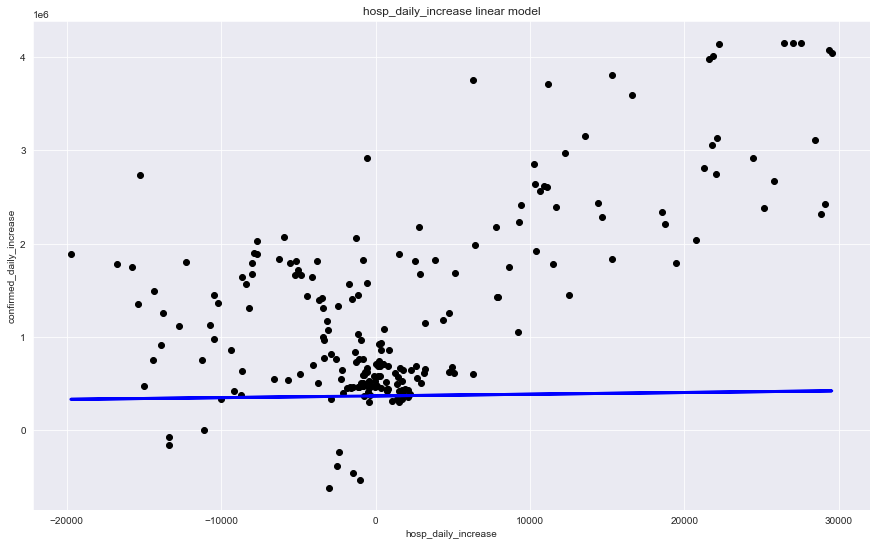

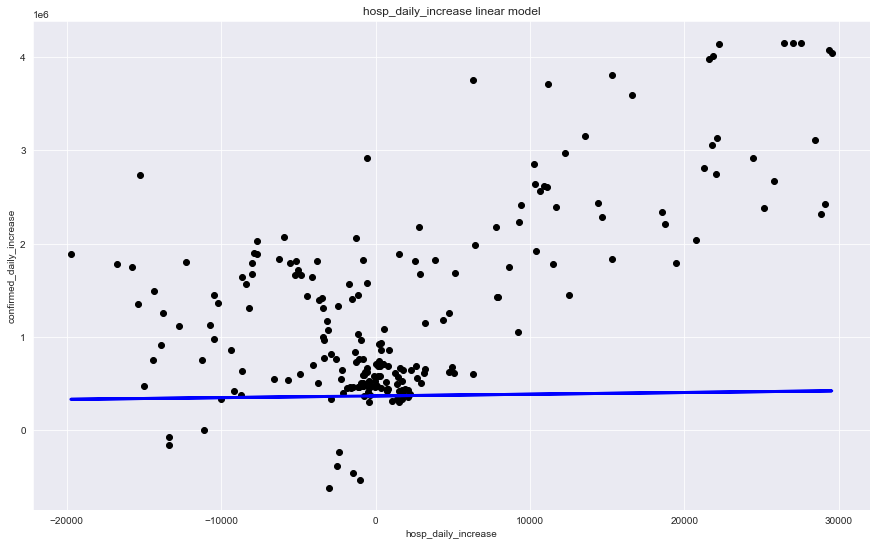

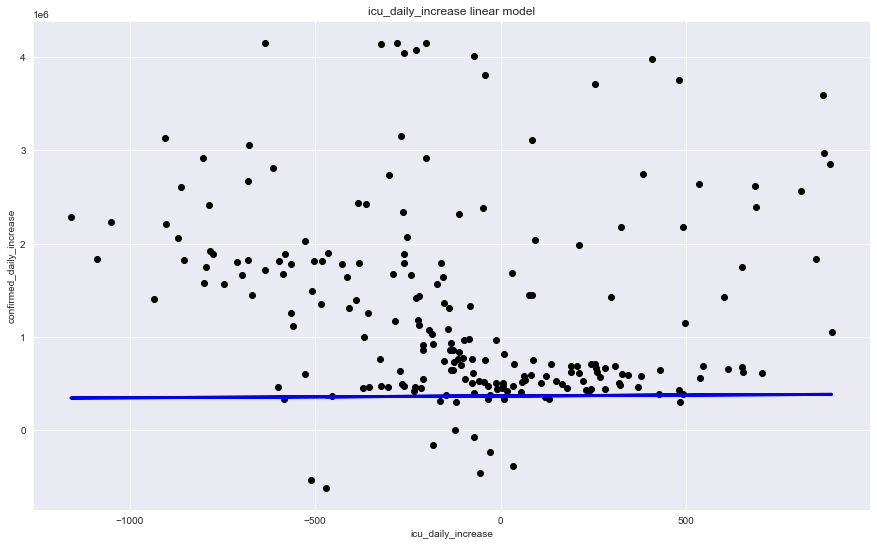

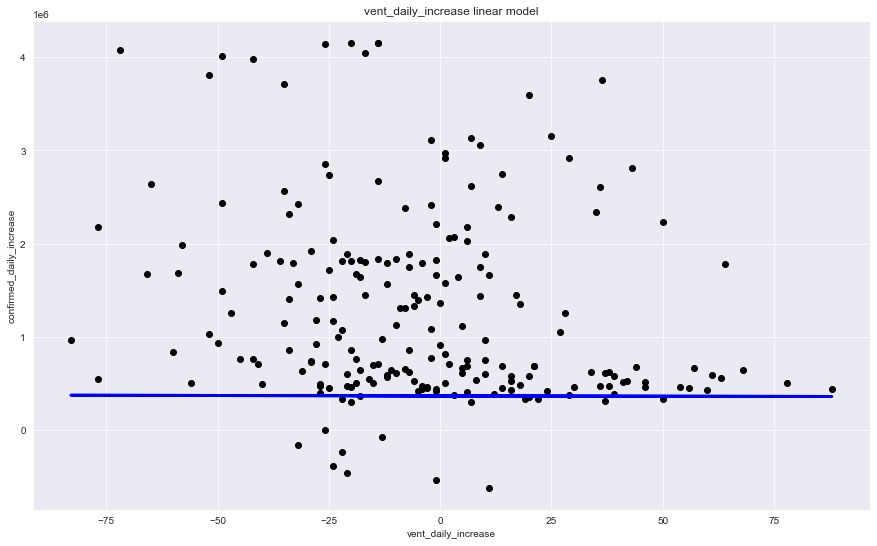

In [ ]:
lin_regr_results_c_global = pd.DataFrame()

to_X_train_c_global = ['deaths_daily_increase', 'recovered_daily_increase', 'tests_daily_increase', 'vaccines_daily_increase', 'people_vaccinated_daily_increase', 'people_fully_vaccinated_daily_increase', 'hosp_daily_increase', 'hosp_daily_increase', 'icu_daily_increase', 'vent_daily_increase']

y_train_c_global = x_global_clear.loc[x_global_clear['date']<cut_off]['confirmed_daily_increase'].values
y_test_c_global = x_global_clear.loc[x_global_clear['date']>cut_off]['confirmed_daily_increase'].values


for c in to_X_train_c_global:
    X_train_c_global = x_global_clear.loc[x_global_clear['date']<cut_off][c].values.reshape(-1,1)
    X_test_c_global = x_global_clear.loc[x_global_clear['date']>cut_off][c].values.reshape(-1,1)

    reg = LinearRegression()
    reg.fit(X_train_c_global, y_train_c_global)
    
    y_pred_c_global = reg.predict(X_test_c_global)
    
    row = {'Model': c, 'mean_square_error': mean_squared_error(y_test_c_global, y_pred_c_global), 'r2-score': r2_score(y_test_c_global, y_pred_c_global)}
    
    lin_regr_results_c_global = lin_regr_results_c_global.append(row,ignore_index=True)
    
    plt.scatter(X_test_c_global, y_test_c_global, color="black")
    plt.plot(X_test_c_global, y_pred_c_global, color="blue", linewidth=3)
    
    plt.title(f"{c} linear model")
    plt.xlabel(c)
    plt.ylabel('confirmed_daily_increase')

    plt.show()

In [ ]:
lin_regr_results_c_global

Model  mean_square_error  r2-score
0                   deaths_daily_increase       1.853544e+12 -0.770220
1                recovered_daily_increase       1.544114e+12 -0.474700
2                    tests_daily_increase       1.445583e+12 -0.380598
3                 vaccines_daily_increase       1.677909e+12 -0.602481
4        people_vaccinated_daily_increase       1.886386e+12 -0.801586
5  people_fully_vaccinated_daily_increase       1.893418e+12 -0.808302
6                     hosp_daily_increase       1.872025e+12 -0.787871
7                     hosp_daily_increase       1.872025e+12 -0.787871
8                      icu_daily_increase       1.907812e+12 -0.822049
9                     vent_daily_increase       1.898148e+12 -0.812819

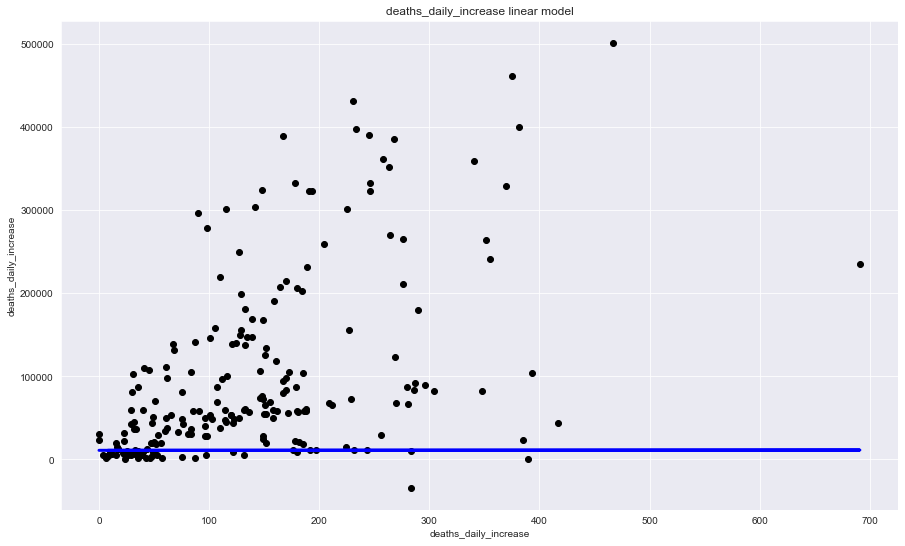

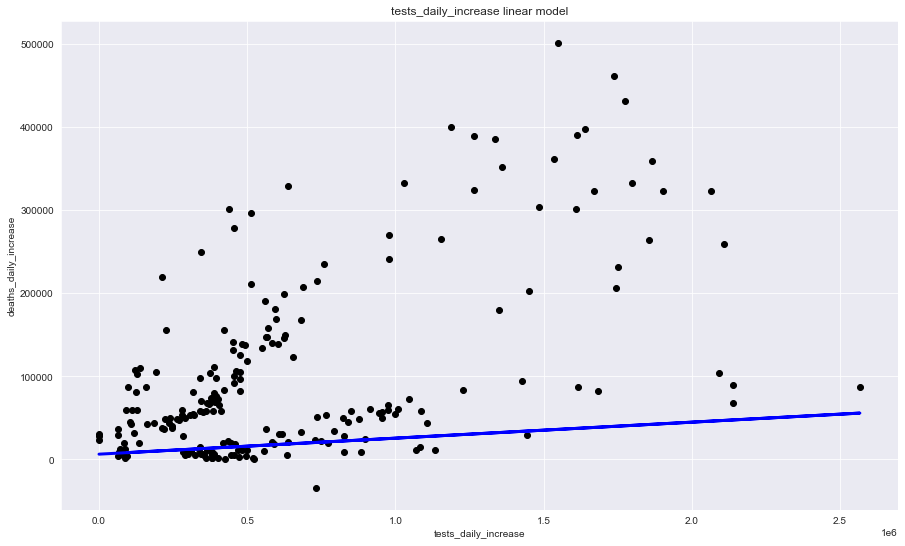

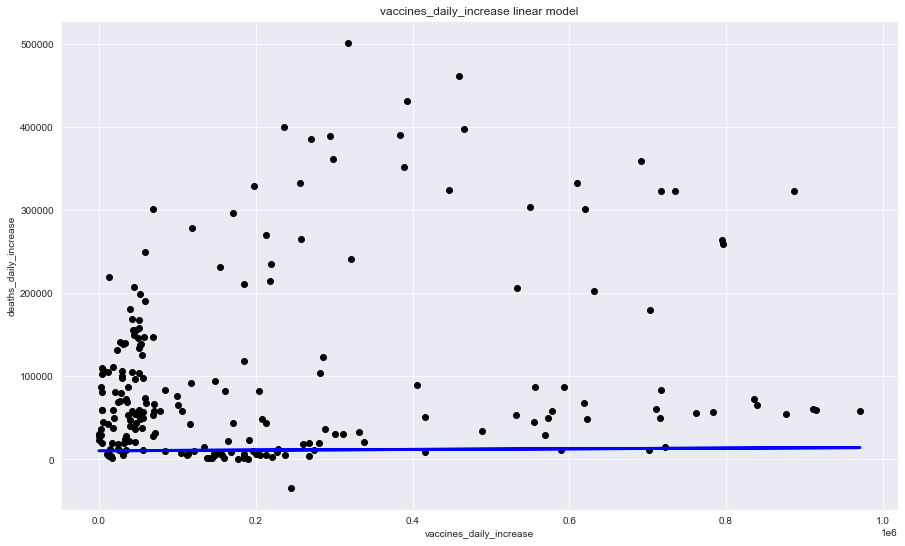

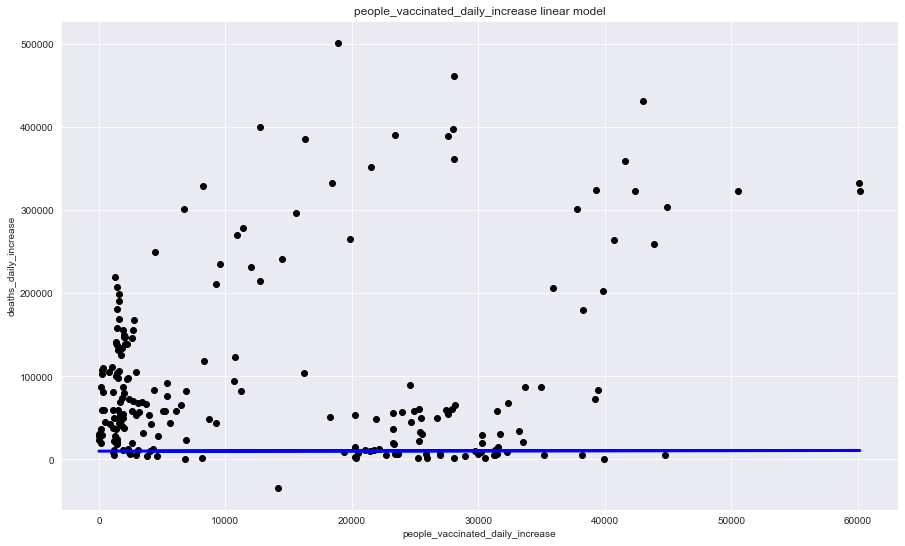

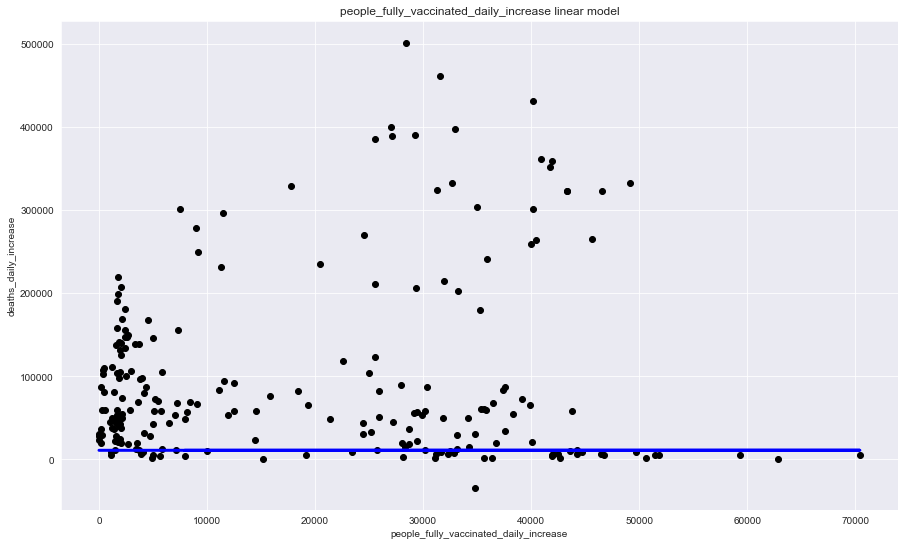

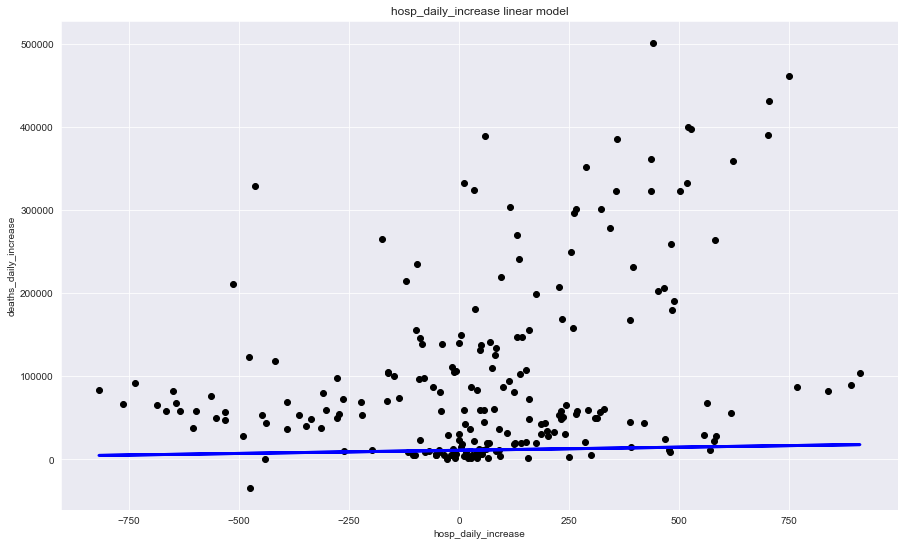

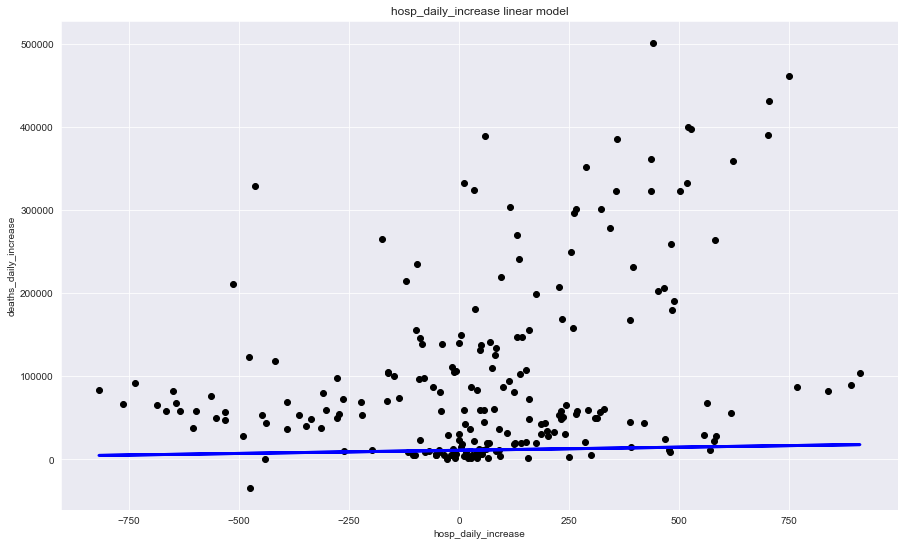

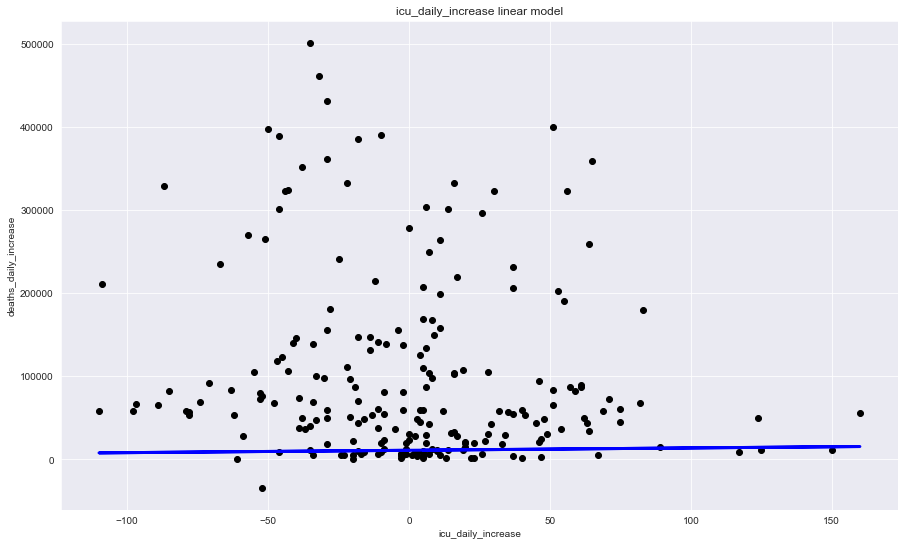

In [ ]:
lin_regr_results_c_local = pd.DataFrame()

to_X_train_c_local = ['deaths_daily_increase', 'tests_daily_increase', 'vaccines_daily_increase', 'people_vaccinated_daily_increase', 'people_fully_vaccinated_daily_increase', 'hosp_daily_increase', 'hosp_daily_increase', 'icu_daily_increase']

y_train_c_local = x_local.loc[x_local['date']<cut_off]['confirmed_daily_increase'].values
y_test_c_local = x_local.loc[x_local['date']>cut_off]['confirmed_daily_increase'].values


for c in to_X_train_c_local:
    X_train_c_local = x_local.loc[x_local['date']<cut_off][c].values.reshape(-1,1)
    X_test_c_local = x_local.loc[x_local['date']>cut_off][c].values.reshape(-1,1)

    reg = LinearRegression()
    reg.fit(X_train_c_local, y_train_c_local)
    
    y_pred_c_local = reg.predict(X_test_c_local)
    
    row = {'Model': c, 'mean_square_error': mean_squared_error(y_test_c_local, y_pred_c_local), 'r2-score': r2_score(y_test_c_local, y_pred_c_local)}
    
    lin_regr_results_c_local = lin_regr_results_c_local.append(row,ignore_index=True)
    
    plt.scatter(X_test_c_local, y_test_c_local, color="black")
    plt.plot(X_test_c_local, y_pred_c_local, color="blue", linewidth=3)
    
    plt.title(f"{c} linear model")
    plt.xlabel(c)
    plt.ylabel('deaths_daily_increase')

    plt.show()

In [ ]:
lin_regr_results_c_local

Model  mean_square_error  r2-score
0                   deaths_daily_increase       1.970590e+10 -0.639422
1                    tests_daily_increase       1.725003e+10 -0.435107
2                 vaccines_daily_increase       1.961350e+10 -0.631735
3        people_vaccinated_daily_increase       1.985286e+10 -0.651649
4  people_fully_vaccinated_daily_increase       1.971746e+10 -0.640384
5                     hosp_daily_increase       1.947431e+10 -0.620155
6                     hosp_daily_increase       1.947431e+10 -0.620155
7                      icu_daily_increase       1.975629e+10 -0.643615

From above r2 scores for both local and global we can infer that models do not follow the trend of the data and fits worse than a horizontal line so our models fit the data really poorly. We have 3 models in global and 4 in local which can be choosed as better than the rest - vent_daily_increase, people_vaccinated_daily_increase, people_fully_vaccinated_daily_increase and hosp_daily_increase for local but I will check normality of residuals only for vent_daily_increase model in global data and for tests_daily_increase because this featuers for each data has the most sens for me.

### Checking assumption of normality of residuals in global model

In [ ]:
X_train_c_global = x_global_clear.loc[x_global_clear['date']<cut_off]["tests_daily_increase"].values.reshape(-1,1)
X_test_c_global = x_global_clear.loc[x_global_clear['date']>cut_off]["tests_daily_increase"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train_c_global, y_train_c_global)

y_pred_c_global1 = reg.predict(X_test_c_global)

residual_c_global = (y_test_c_global - y_pred_c_global1)

residual_c_global.mean()

762256.2660427144

The mean of resiuduals should be approximately zero but it's not.

Text(0, 0.5, 'Residuals')

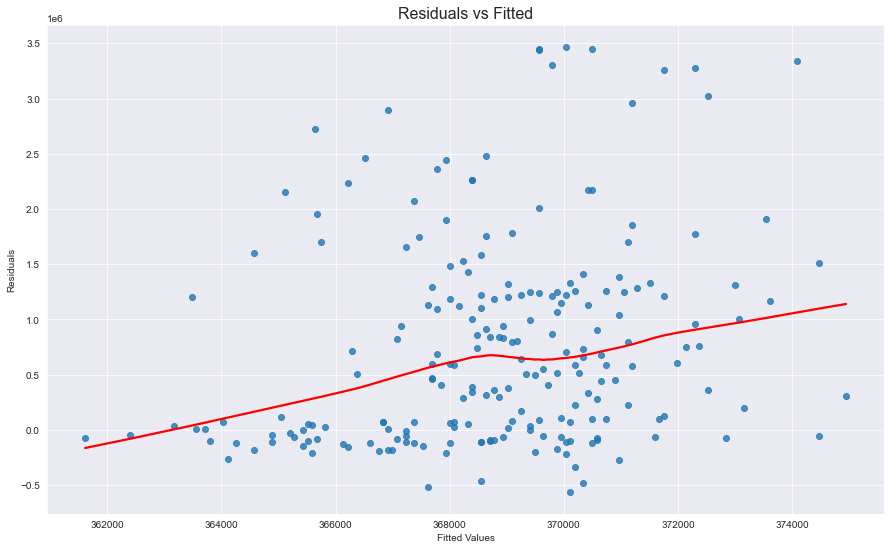

In [ ]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

#fig, ax = plt.subplots(1,2)

sns.regplot(x=y_pred_c_global, y=residual_c_global, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

The graph doesn't indicates normality of residuals so we can reject assumption about normality of residuals.

### Checking assumption of normality of residuals in local model

In [ ]:
X_train_c_local = x_local.loc[x_local['date']<cut_off]["tests_daily_increase"].values.reshape(-1,1)
X_test_c_local = x_local.loc[x_local['date']>cut_off]["tests_daily_increase"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train_c_local, y_train_c_local)

y_pred_c_local1 = reg.predict(X_test_c_local)

residual_c_local = (y_test_c_local - y_pred_c_local1)

residual_c_local.mean()

79933.72237387992

The mean of resiuduals should be approximately zero but it's not.

Text(0, 0.5, 'Residuals')

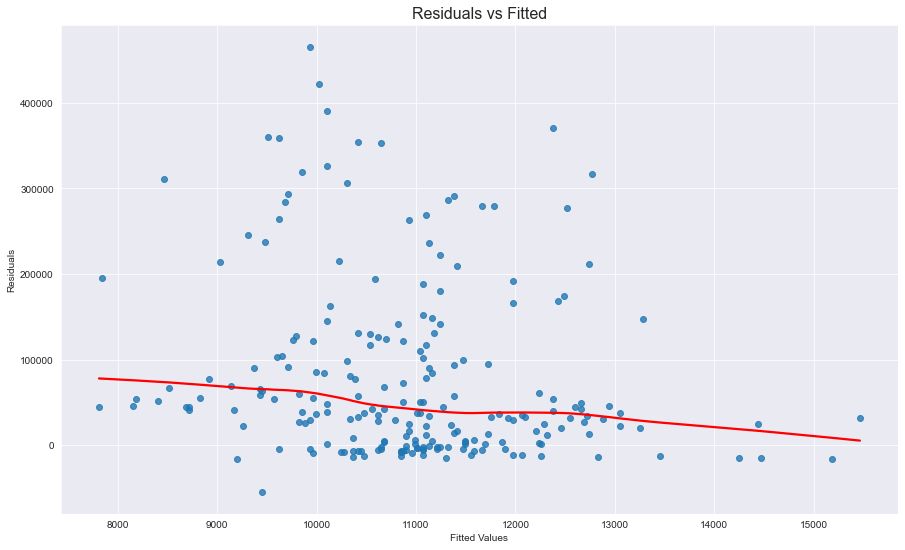

In [ ]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

#fig, ax = plt.subplots(1,2)

sns.regplot(x=y_pred_c_local, y=residual_c_local, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

The graph doesn't indicates normality of residuals and we can also in local data reject asumption about normality of residuals.

## Multi-linear Regression

After exploration of variables linearity from the pair plot and corelations from corelation map I chose three features (deaths_daily_increase, recovered_daily_increase and tests_daily_increase) to make predictions of confirmed_daily_increase.


### global

In [ ]:
X_train_c_global = x_global_clear.loc[x_global_clear['date']<cut_off][['deaths_daily_increase','recovered_daily_increase', 'tests_daily_increase']]
X_test_c_global = x_global_clear.loc[x_global_clear['date']>cut_off][['deaths_daily_increase','recovered_daily_increase', 'tests_daily_increase']]

reg_lr_c_global = LinearRegression()
reg_lr_c_global.fit(X_train_c_global, y_train_c_global)

y_pred_c_global1 = reg_lr_c_global.predict(X_test_c_global)

print(f'Mean square error of multi-linear model: {mean_squared_error(y_test_c_global, y_pred_c_global1)} r2-score: {r2_score(y_test_c_global, y_pred_c_global1)}')

Mean square error of multi-linear model: 1549255696503.3547 r2-score: -0.4796110337267485


### local

In [ ]:
X_train_c_local = x_local.loc[x_local['date']<cut_off][['deaths_daily_increase','recovered_daily_increase', 'tests_daily_increase']]
X_test_c_local = x_local.loc[x_local['date']>cut_off][['deaths_daily_increase','recovered_daily_increase', 'tests_daily_increase']]

reg_lr_c_local = LinearRegression()
reg_lr_c_local.fit(X_train_c_local, y_train_c_local)

y_pred_c_local1 = reg_lr_c_local.predict(X_test_c_local)

print(f'Mean square error of multi-linear model: {mean_squared_error(y_test_c_local, y_pred_c_local1)} r2-score: {r2_score(y_test_c_local, y_pred_c_local1)}')

Mean square error of multi-linear model: 18470734574.302 r2-score: -0.5366633880427087


R2 score show us that also for this multi-linear model we have doesn't fit the data well trained on local and global data.

## Support Vector Regression

### global

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train_c_global, y_train_c_global)

y_pred_c_global2 = svr.predict(X_test_c_global)

print(f'Mean square error of Random Forest Regressor model: {mean_squared_error(y_test_c_global, y_pred_c_global2)} r2-score: {r2_score(y_test_c_global, y_pred_c_global2)}')



Mean square error of Random Forest Regressor model: 1889675250085.3145 r2-score: -0.8047274936584556


### local

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train_c_local, y_train_c_local)

y_pred_c_local2 = svr.predict(X_test_c_local)

print(f'Mean square error of Random Forest Regressor model: {mean_squared_error(y_test_c_local, y_pred_c_local2)} r2-score: {r2_score(y_test_c_local, y_pred_c_local2)}')



Mean square error of Random Forest Regressor model: 20748976085.546307 r2-score: -0.7262005342436479


In case of both SVR models we got worst results than in multi-linear and this is also bad result.


## Random Forest Regressor

### global

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_c_global, y_train_c_global)

y_pred_c_global3 = rf.predict(X_test_c_global)

print(f'Mean square error of Random Forest Regressor model: {mean_squared_error(y_test_c_global, y_pred_c_global3)} r2-score: {r2_score(y_test_c_global, y_pred_c_global3)}')


Mean square error of Random Forest Regressor model: 1708490479554.2458 r2-score: -0.6316876357279171


### local

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_c_local, y_train_c_local)

y_pred_c_local3 = rf.predict(X_test_c_local)

print(f'Mean square error of Random Forest Regressor model: {mean_squared_error(y_test_c_local, y_pred_c_local3)} r2-score: {r2_score(y_test_c_local, y_pred_c_local3)}')


Mean square error of Random Forest Regressor model: 19485826911.868534 r2-score: -0.621113479853967


Both random forest regression models doesn't fit well.

# Conclusions

Based on the analysis carried out, we can draw the following conclusions. Accurate prediction of the future values of the daily increase in the number of deaths and cases of COVID-19 infection is impossible to achieve for both global and local in our case.
Regression models are not good aproch in this task because we can't well fit regression line to training and testing data cause the time series have too much variation.
We can analyze this problem both globally and locally cause all countries have been affected by pandemics but diffrence in raporting in each country has a bad influence on the results of the analysis.
The way to solve the results could be shifting of one of the time series into other and some sort of smoothing of the data.

On the basis of the analysis, we can conclude that there is a relationship between some variables and the variables that we want to predict because we see some linear relationship and correlation in the plots, but the methods used for this have bad accuracy in this problem.